In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [2]:
from IPython.display import display, HTML

In [3]:
def display_colored_heading_with_border(text, text_color, background_color, border_color):
    html_string = f"""
    <div style='
        border: 2px solid {border_color}; 
        background-color: {background_color}; 
        color: {text_color}; 
        padding: 10px; 
        border-radius: 5px;'>
        <h2>{text}</h2>
    </div>
    """
    display(HTML(html_string))

In [4]:
display_colored_heading_with_border("Data Cleaning Stage ", "black", "lightblue", "black")

#### Reading CSV Files :--

In [5]:
df1 = pd.read_csv(r"C:\Users\HARSH\Desktop\zomato.csv")
df1.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df2 = pd.read_csv(r"C:\Users\HARSH\Desktop\Zomato Dataset.csv")
df2.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [7]:
df1.shape

(51717, 17)

In [8]:
df2.shape

(45584, 20)

#### Cleaning of dataset 1 as part of data preparation and EDA :--

##### dropping unwanted columns :--

In [9]:
df1 = df1.drop(['url', 'address','phone','menu_item','dish_liked'],axis = 1)
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   reviews_list                 51717 non-null  object
 10  listed_in(type)              51717 non-null  object
 11  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [11]:
df1.isnull().sum()[df1.isnull().sum()>0]

rate                           7775
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
dtype: int64

#### Dropping duplicates :-

In [12]:
df1.drop_duplicates(inplace=True)
df1.shape

(51645, 12)

#### cleaning Rate column :--

In [13]:
df1['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### Removing 'NEW', '-' and '/5' from Rate column:-

In [14]:
def handlerate(value):
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [15]:
df1['rate'] = df1['rate'].apply(handlerate)
df1['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

#### filling Null values in rate column with mean :-

In [16]:
df1['rate'].fillna(df1['rate'].mean(),inplace=True)

#### Sanity Check for nulls :--

In [17]:
df1.isnull().sum()[df1.isnull().sum()>0]

location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    345
dtype: int64

#### dropping remaining null value records since they are very less in comparison to size of the dataset

In [18]:
df1.dropna(inplace=True)

In [19]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


#### Renaming some of the column names:--

In [20]:
df1.rename({'approx_cost(for two people)':'Cost2people',
             'listed_in(type)':'Type'},axis=1, inplace=True)

In [21]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,reviews_list,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


#### dropping listed_in(city) column bacause we already have city names in column - location

In [22]:
df1.drop(['listed_in(city)'],axis=1 , inplace=True)

In [23]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,reviews_list,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [24]:
df1['Cost2people'].unique() # lets remove ',' from the values because it is restricting values to become an integer.

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [25]:
df1['Cost2people'].info()

<class 'pandas.core.series.Series'>
Int64Index: 51077 entries, 0 to 51716
Series name: Cost2people
Non-Null Count  Dtype 
--------------  ----- 
51077 non-null  object
dtypes: object(1)
memory usage: 798.1+ KB


#### removing ',' from Cost2people column :-

In [26]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)

In [27]:
df1['Cost2people'] = df1['Cost2people'].apply(handlecomma)
df1['Cost2people'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

#### cleaning rest_type column :--

In [28]:
rest_types = df1['rest_type'].value_counts(ascending=False)
rest_types

Quick Bites                   19015
Casual Dining                 10259
Cafe                           3685
Delivery                       2574
Dessert Parlor                 2243
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [29]:
# there are so many values with less number of rest_types ; lets cluster them as others category for better interpretability 
# all the restaurant types having less than 1000 restaurants will be stored in a list

In [30]:
rest_types_lessthan_1000 = rest_types[rest_types<1000]
rest_types_lessthan_1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            415
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

#### making rest_types less than 1000 in frequency as others:--

In [31]:
def handle_rest_type(value):
    if(value in rest_types_lessthan_1000):
        return 'others'
    else:
        return value

In [32]:
df1['rest_type'] = df1['rest_type'].apply(handle_rest_type)

In [33]:
df1['rest_type'].value_counts()

Quick Bites           19015
Casual Dining         10259
others                 9016
Cafe                   3685
Delivery               2574
Dessert Parlor         2243
Takeaway, Delivery     2009
Bakery                 1140
Casual Dining, Bar     1136
Name: rest_type, dtype: int64

#### cleaning location column :--

In [34]:
df1['location'].value_counts()

BTM                      5056
HSR                      2495
Koramangala 5th Block    2480
JP Nagar                 2218
Whitefield               2106
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

#### here also some locations are having very less number of restaurants . we will make a cluster of them as others

In [35]:
location = df1['location'].value_counts(ascending=False)
location_lessthan_300 = location[location < 300]

In [36]:
def handle_location(value):
    if value in location_lessthan_300:
        return 'others'
    else:
        return value

In [37]:
df1['location'] = df1['location'].apply(handle_location)

In [38]:
df1['location'].value_counts()

BTM                      5056
others                   4955
HSR                      2495
Koramangala 5th Block    2480
JP Nagar                 2218
Whitefield               2106
Indiranagar              2032
Jayanagar                1916
Marathahalli             1808
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1215
Koramangala 7th Block    1176
Koramangala 6th Block    1127
Sarjapur Road            1049
Koramangala 4th Block    1017
Ulsoor                   1013
Banashankari              902
MG Road                   894
Kalyan Nagar              841
Richmond Road             804
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            673
Brookefield               656
New BEL Road              644
Banaswadi                 641
Kammanahalli              639
Rajajinagar               591
Church Street             568
Lavelle Ro

#### cleaning cuisines column :--

In [39]:
df1['cuisines'].value_counts()

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

#### here also some cuisine types are having very less number of restaurants. Hence we will cluster them as others

In [40]:
cuisines = df1['cuisines'].value_counts(ascending=False)

In [41]:
cuisines_lessthan_100 = cuisines[cuisines<100]

In [42]:
def handle_cuisines(value):
    if value in cuisines_lessthan_100 :
        return 'others'
    else:
        return value

In [43]:
df1['cuisines'] = df1['cuisines'].apply(handle_cuisines)

In [44]:
df1['cuisines'].value_counts()

others                                 26187
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [45]:
df1['Type'].value_counts()

Delivery              25599
Dine-out              17567
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  870
Pubs and bars           688
Name: Type, dtype: int64

In [46]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,reviews_list,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [47]:
df1_reviews = df1  # taking a backup of the reviews data for further analysis

In [48]:
df1.drop(['reviews_list'],axis=1 , inplace=True) # dropping reviews column since it is not needed for vizualization

In [49]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [51]:
display_colored_heading_with_border("Data Visualization :-- ", "black", "lightblue", "black")

#### count plot of various locations:--

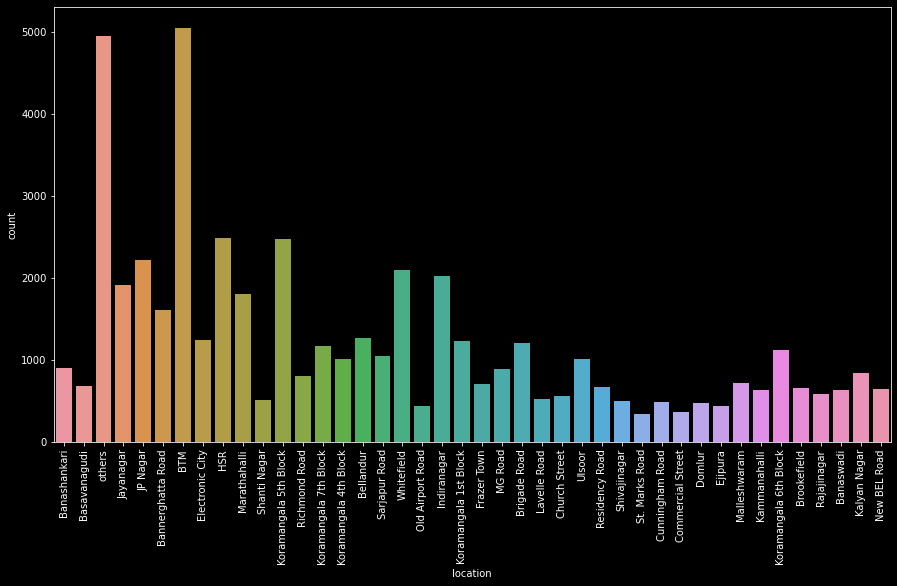

In [52]:
plt.figure(figsize=(15,8))
ax = sns.countplot(df1['location'])
plt.xticks(rotation=90);

In [53]:
# hence locations like : BTM , HSR , Koramangala 5th block , whitefield , Indiranagar are already saturated with many restaurant
# business owners should avoid opening restaurants there.

#### visualization of online orders :--

#### how many restaurants are having online order facility

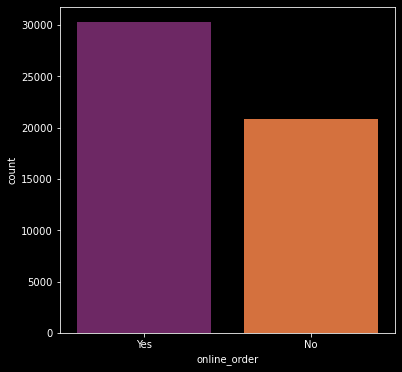

In [54]:
plt.figure(figsize=(6,6))
sns.countplot(df1['online_order'], palette='inferno');

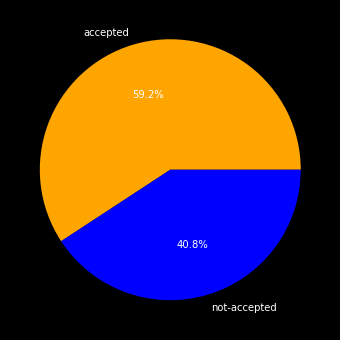

In [55]:
plt.figure(figsize=(6,6))
x=df1.online_order.value_counts()
labels=['accepted','not-accepted']
plt.pie(x,labels=labels,autopct='%1.1f%%',colors = ['orange','blue'])
plt.show()

In [56]:
# most of the restaurants are having online order facility

#### visualizing book table :--

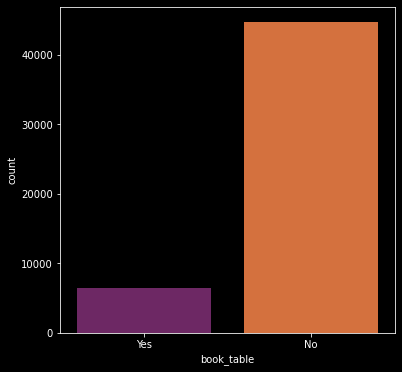

In [57]:
plt.figure(figsize=(6,6))
sns.countplot(df1['book_table'], palette='inferno');

In [58]:
# most of the restaurants are not having book table facility

#### visualizing online_order and rate :--

<AxesSubplot:xlabel='online_order', ylabel='rate'>

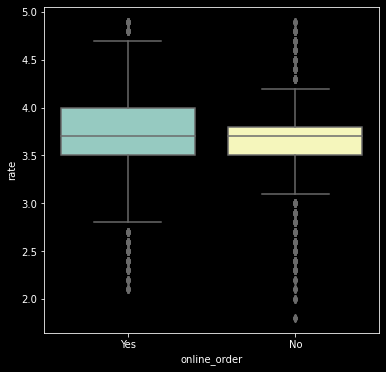

In [59]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df1)

In [60]:
# restaurants which are having online order facility are having higher ratings overall(rating from 1 to 5 )

#### visualizing book table vs rate :--

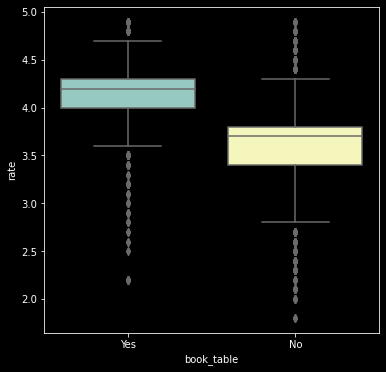

In [61]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df1);

In [62]:
# restaurants which are providing book table facility are getting more rating on average.
# hence a business owner must provide book table facility at their restaurants.

#### visualizing online order facility location wise:-

In [63]:
df1_1 = df1.groupby(['location','online_order']).name.count()
df1_1.to_csv('location_online.csv')
df1_1 = pd.read_csv('location_online.csv')
df1_1 = pd.pivot_table(df1_1 , values=None, index = ['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1_1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   339
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            553   662
Brookefield             239   417
Church Street           226   342
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   220
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1911
Indiranagar             701  1331
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   867  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   390   786
Lavelle Road            316   205
MG Road                 520   374
Malleshwaram            309   412
Marathahalli            701  1107
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          425   248
Richmond Road           557   247
Sarjapur Road           324   725
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   624
Whitefield              986  1120
others                 2064  2891

In [64]:
# hence we are getting name of locations and number of restaurants present there which are providing online order  facility
# and number of restaurants which are not providing online order facility.

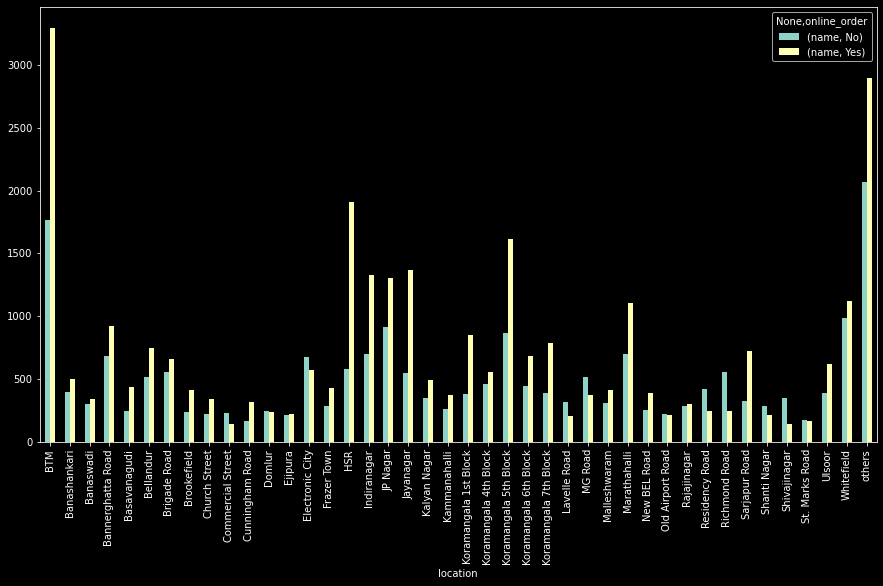

In [65]:
df1_1.plot(kind='bar', figsize=(15,8));

#### Visualizing book Table facility , location wise :-

In [66]:
df1_2 = df1.groupby(['location','book_table']).name.count()
df1_2.to_csv('location_booktable.csv')
df1_2 = pd.read_csv('location_booktable.csv')
df1_2 = pd.pivot_table(df1_2 , values=None, index = ['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df1_2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               633    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1036  179
Brookefield             582   74
Church Street           386  182
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 434    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2278  217
Indiranagar            1579  453
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1788  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  164
Lavelle Road            290  231
MG Road                 547  347
Malleshwaram            632   89
Marathahalli           1642  166
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          523  150
Richmond Road           688  116
Sarjapur Road           893  156
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  836  177
Whitefield             1853  253
others                 4587  368

In [67]:
# here we are getting data of restaurants location wise ; how many are provinding book table facility .

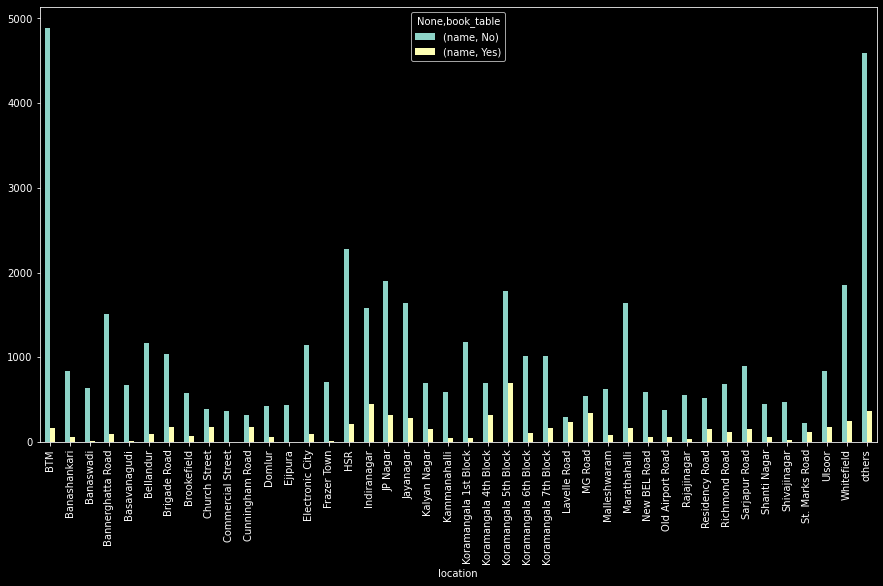

In [68]:
df1_2.plot(kind='bar',figsize=(15,8));

In [69]:
# as we can see most of the restaurants are not providing book table facility.
# but we just cannot open a restaurant with book table facility at BTM since its already saturated. location like HSR ,
#Indiranagar,Kormangla 5th block , Whitefield can be selected because number of restaurants is less there

#### Visualizing Types of Restaurants vs Rate :--

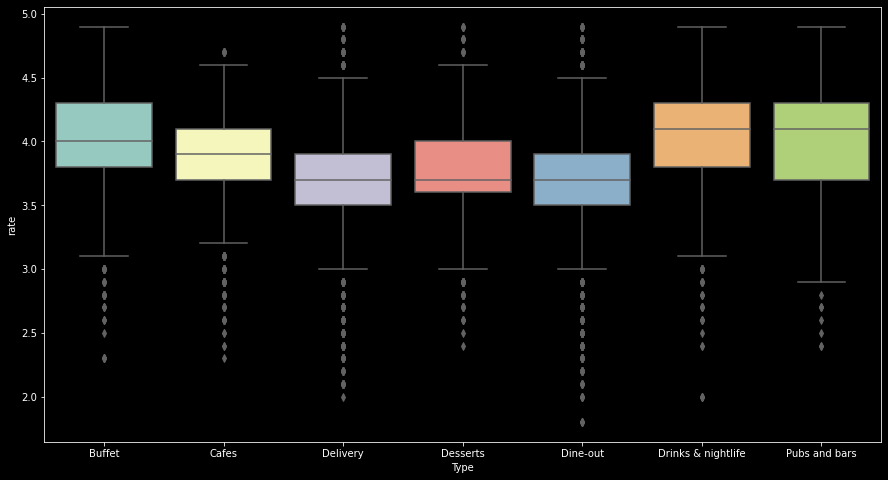

In [70]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Type',y='rate',data=df1);

In [71]:
#max average ratings are given to Drinks and Nightlife , Pubs and Bars , Buffet and cafes. Minimum ratings is given to Delivery.

#### Grouping types of restaurants , location wise:-

In [72]:
df1_3 = df1.groupby(['location','Type']).name.count()
df1_3.to_csv('location_Type.csv')
df1_3 = pd.read_csv('location_Type.csv')
df1_3 = pd.pivot_table(df1_3 , values=None, index = ['location'],columns=['Type'],fill_value=0,aggfunc=np.sum)
df1_3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      311       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      501      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      195       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      246       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1695      120      580   
Indiranagar               38    97     1093      140      531   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      843   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      504      127      417   
Lavelle Road              30    27      129       50      191   
MG Road                   51    76      267       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      631   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      188       63      289   
Richmond Road             63    21      258       78      356   
Sarjapur Road             26    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      458       71      359   
Whitefield                28    51     1042      137      768   
others                    83   133     2787      276     1554   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          58            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<AxesSubplot:xlabel='location'>

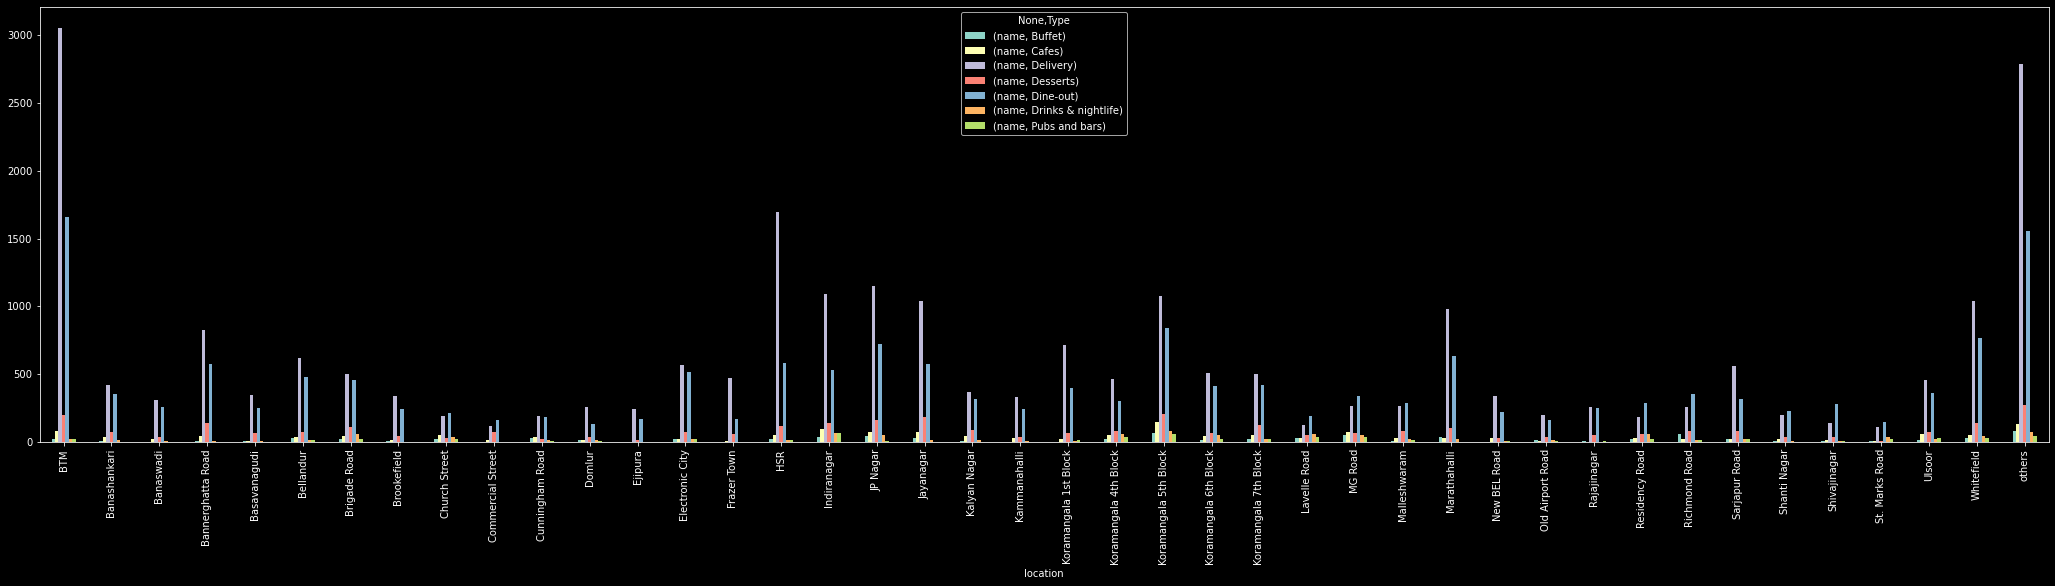

In [73]:
df1_3.plot(kind = 'bar',figsize=(36,8))

In [74]:
# now if one wants to open Pub and Bar , drinks and night life type of restaurants ; one must select a location where they are
# less in number. viz . Shivajinagar,Shantinagar etc.

#### Number of votes , location wise:-

In [75]:
df1_4 = df1[['location','votes']]
df1_4.drop_duplicates()
df1_5 = df1_4.groupby('location').votes.sum()
df1_5 = df1_5.to_frame()
df1_5 = df1_5.sort_values('votes',ascending = False)
df1_5.head()

,votes
location,
Koramangala 5th Block,2214816
Indiranagar,1172729
Koramangala 4th Block,685156
Church Street,594938
JP Nagar,586522


In [76]:
# number of votes given to the restaurants location wise

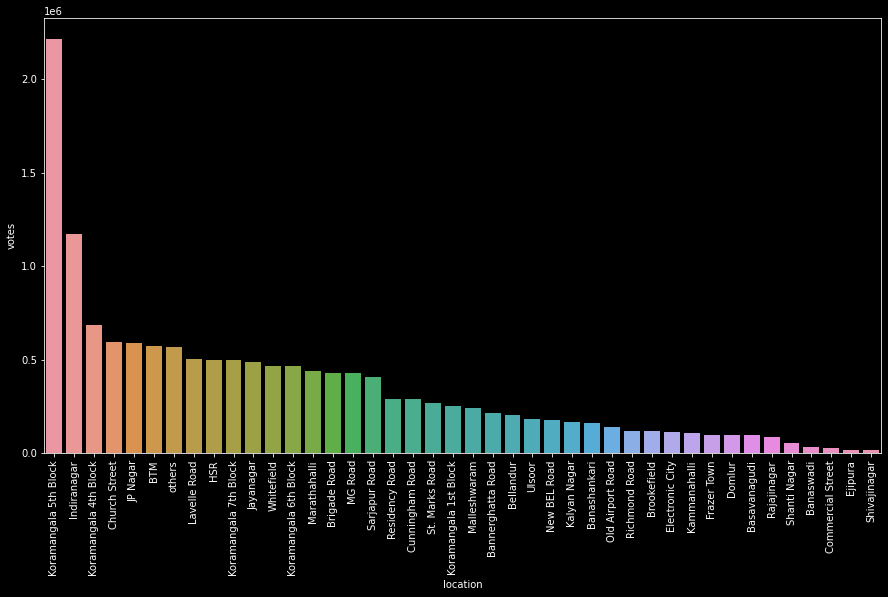

In [77]:
plt.figure(figsize=(15,8))
sns.barplot(df1_5.index,df1_5['votes'])
plt.xticks(rotation=90);

In [78]:
# hence if one opens reataurant in above top locations , one will get large amount of customer feedback.

#### Vizualizing top cuisines :--

In [79]:
df1_6 = df1[['cuisines','votes']]
df1_6.drop_duplicates()
df1_7 = df1_6.groupby('cuisines').votes.sum()
df1_7 = df1_7.to_frame()
df1_7 = df1_7.sort_values('votes',ascending = False)
df1_7.head()

,votes
cuisines,
others,11584911
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [80]:
# if we neglect the others , north indian is getting highest number of votes.

In [81]:
df1_7 = df1_7.iloc[1:, ::]
df1_7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


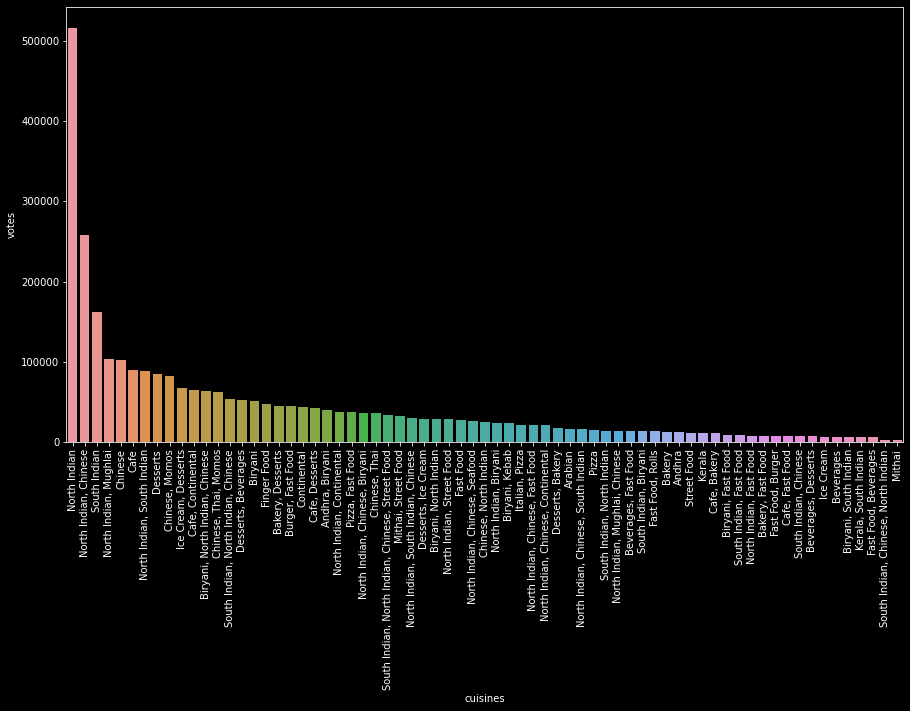

In [82]:
plt.figure(figsize=(15,8))
sns.barplot(df1_7.index,df1_7.votes)
plt.xticks(rotation=90);

In [83]:
# as we can see most number of votes are given to North Indian , North indian + Chinese , followed by south Indian.
# so one can think of opening these types of restaurants.

#### if one wants to open a franchise outlet . Top 15 franchise outlets are as follows:--

In [84]:
df1['name'].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Mast Biryani - Night Express                                1
Kings Court Daba                                            1
New Prakash Hotel                                           1
Taja Coffee                                                 1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8723, dtype: int64

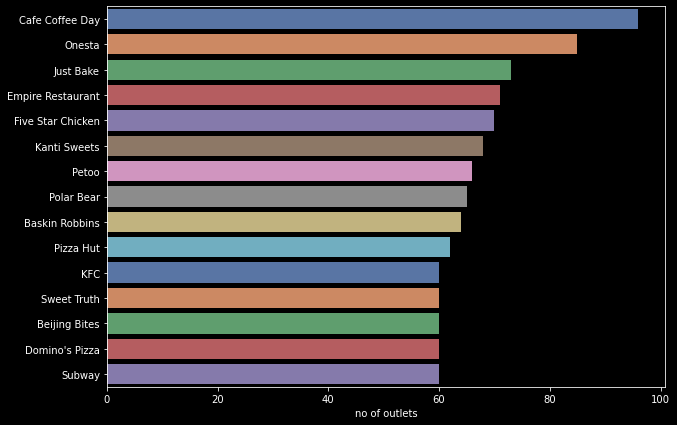

In [85]:
plt.figure(figsize=(10,7))
chains = df1['name'].value_counts()[0:15]
sns.barplot(chains, chains.index , palette='deep')
plt.xlabel('no of outlets')
plt.show()

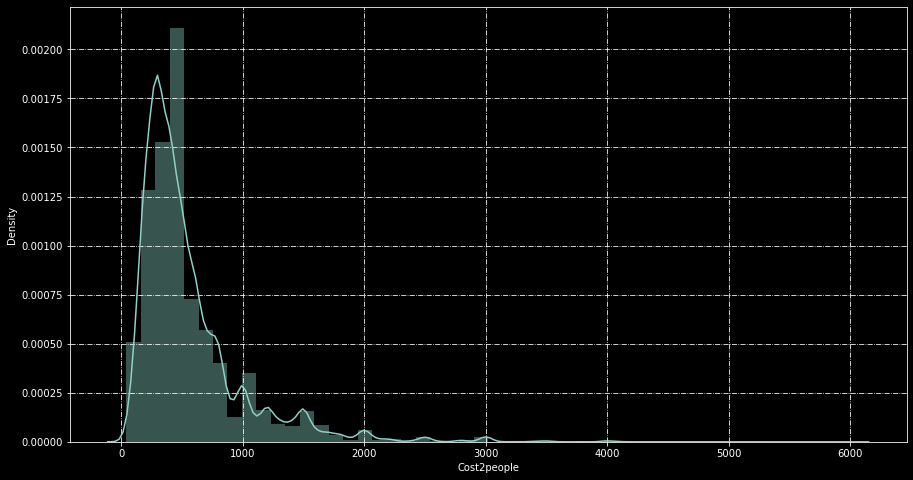

In [86]:
plt.figure(figsize=(15,8))
sns.distplot(df1['Cost2people'])
plt.grid(linestyle='-.');

In [87]:
df1['Cost2people'].describe()

count    51077.000000
mean       556.165691
std        439.668518
min         40.000000
25%        300.000000
50%        400.000000
75%        700.000000
max       6000.000000
Name: Cost2people, dtype: float64

In [88]:
# Hence most values of cost of two people is lying between INR 300 to 1000.

#### Conclusions:-

####  Most number of restaurants are at BTM , followed by HSR , Kormangla 5th block . 59.2% restaurants accept online orders 
####  and 48.2% dont accept online orders . Restaurants that accept online orders get max ratings . restaurants that provide 
####  book table facility have more avg ratings . majority restautants at all locations accept online orders; BTM being highest .
####  Famous types of restaurants are: Drinks and Nightlife, Pubs and Bars , Buffet and Cafes . Top cuisines are: 
####  North Indian followed by Chinese and South Indian . Top Franchise chains are: Cafe CoffeeDay followed by Onesta and 
####  JustBake.Average cost of two people is between INR 300 to 1000
 

#### data preparation for dataset 2 :--

In [50]:
df2.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [51]:
df2.shape

(45584, 20)

In [52]:
df2_delivery_person_id = df2 # just taking backup ; we will use this dataset for clustering purpose.

In [91]:
display_colored_heading_with_border(" Cleaning of dataset 2 :-- ", "black", "lightblue", "black")

#### check for nulls in df2:--

In [92]:
df2.isnull().sum()[df2.isnull().sum()>0]

Delivery_person_Age        1854
Delivery_person_Ratings    1908
Time_Orderd                1731
Weather_conditions          616
Road_traffic_density        601
multiple_deliveries         993
Festival                    228
City                       1200
dtype: int64

#### dropping unique columns:--

In [93]:
df2.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

In [94]:
df2.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          43730 non-null  float64
 1   Delivery_person_Ratings      43676 non-null  float64
 2   Restaurant_latitude          45584 non-null  float64
 3   Restaurant_longitude         45584 non-null  float64
 4   Delivery_location_latitude   45584 non-null  float64
 5   Delivery_location_longitude  45584 non-null  float64
 6   Order_Date                   45584 non-null  object 
 7   Time_Orderd                  43853 non-null  object 
 8   Time_Order_picked            45584 non-null  object 
 9   Weather_conditions           44968 non-null  object 
 10  Road_traffic_density         44983 non-null  object 
 11  Vehicle_condition            45584 non-null  int64  
 12  Type_of_order                45584 non-null  object 
 13  Type_of_vehicle 

In [96]:
df2.drop_duplicates(inplace=True)

In [97]:
# Fill missing values in numerical columns with the median
df2['Delivery_person_Age'].fillna(df2['Delivery_person_Age'].median(), inplace=True)
df2['Delivery_person_Ratings'].fillna(df2['Delivery_person_Ratings'].median(), inplace=True)
df2['multiple_deliveries'].fillna(df2['multiple_deliveries'].median(), inplace=True)

In [98]:
# Fill missing values in categorical columns with the mode
df2['Weather_conditions'].fillna('Fog', inplace=True)
df2['Road_traffic_density'].fillna('Low', inplace=True)
df2['Festival'].fillna('No', inplace=True)
df2['City'].fillna('Metropolitian', inplace=True)

In [99]:
df2.dropna(inplace=True)

In [100]:
# Sanity check for nulls in df2:--
df2.isnull().sum()[df2.isnull().sum()>0]

Series([], dtype: int64)

In [101]:
df2['Order_Date'] = pd.to_datetime(df2['Order_Date'], format='%d-%m-%Y')
df2['Time_taken (min)'] = df2['Time_taken (min)'].astype(int)
df2['Delivery_person_Age'] = df2['Delivery_person_Age'].astype(int)
df2['multiple_deliveries'] = df2['multiple_deliveries'].astype(int)

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43853 entries, 0 to 45583
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43853 non-null  int32         
 1   Delivery_person_Ratings      43853 non-null  float64       
 2   Restaurant_latitude          43853 non-null  float64       
 3   Restaurant_longitude         43853 non-null  float64       
 4   Delivery_location_latitude   43853 non-null  float64       
 5   Delivery_location_longitude  43853 non-null  float64       
 6   Order_Date                   43853 non-null  datetime64[ns]
 7   Time_Orderd                  43853 non-null  object        
 8   Time_Order_picked            43853 non-null  object        
 9   Weather_conditions           43853 non-null  object        
 10  Road_traffic_density         43853 non-null  object        
 11  Vehicle_condition            43853 non-nu

In [104]:
display_colored_heading_with_border("Visualization of dataset 2:- ", "black", "lightblue", "black")

#### Distribution of Delivery Person Age:

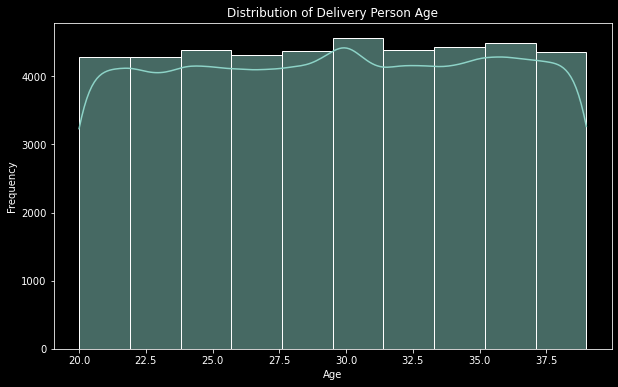

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Delivery_person_Age'], bins=10,kde=True)
plt.title('Distribution of Delivery Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [106]:
# frequency distribution is almost similar for age groups 20 to 39

#### Delivery Person Ratings Distribution

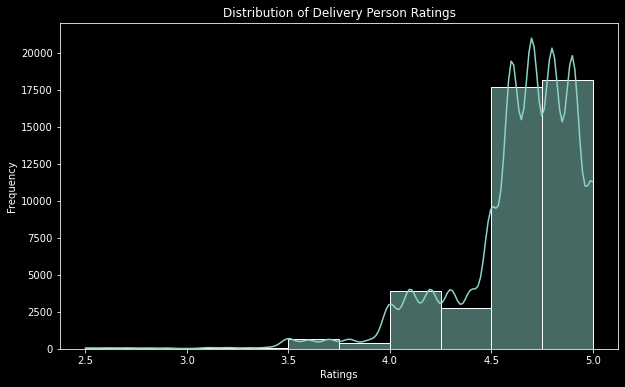

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Delivery_person_Ratings'], bins=10, kde=True)
plt.title('Distribution of Delivery Person Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [108]:
# frequency distribution is high between ratings 4.5 and 5 .

#### Count of Orders by Weather Conditions:

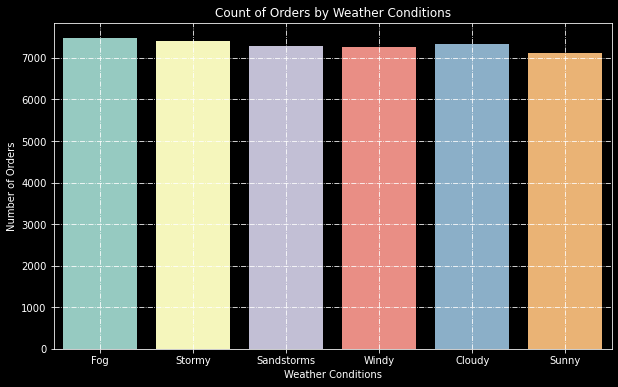

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_conditions', data=df2)
plt.title('Count of Orders by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Orders')
plt.grid(linestyle='-.')
plt.show()

In [110]:
# frequency of number of orders remains almost similar in all weather conditions

#### Count of Orders by Traffic Density:

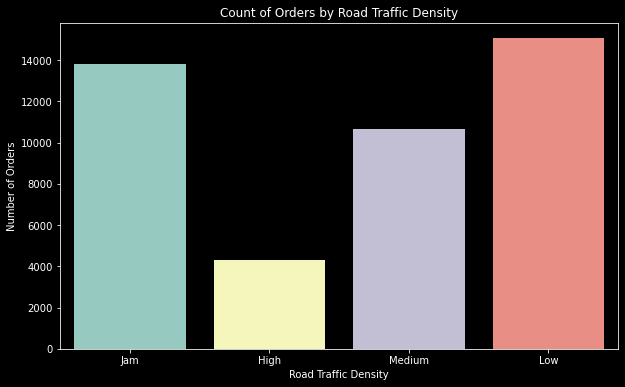

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_traffic_density', data=df2)
plt.title('Count of Orders by Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Number of Orders')
plt.show()

In [112]:
# most number of orders were placed and delivered during low traffic conditions

#### Boxplot of Delivery Time by Traffic Density:

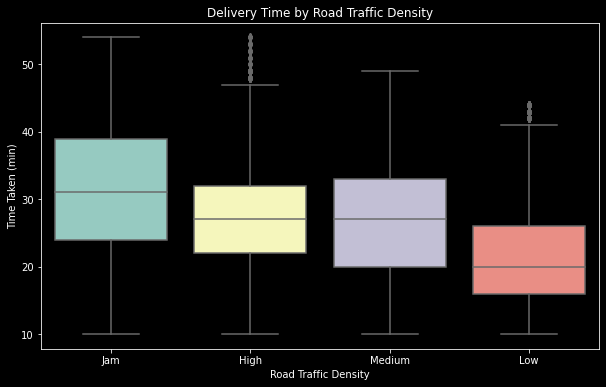

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Road_traffic_density', y='Time_taken (min)', data=df2)
plt.title('Delivery Time by Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Time Taken (min)')
plt.show()

In [114]:
# average time taken to deliver was most in traffic jam conditions, time taken for delivery in high and medium conditions
# remain almost similar , followed by low.

In [115]:
display_colored_heading_with_border("Building Predictive models to predict cost of food for two people :- ", "black", "lightblue", "black")

In [116]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [117]:
df1_cost2people = df1 # backup of original data for building predictive models

In [118]:
df1_cost2people.corr()

,rate,votes,Cost2people
rate,1.000000,0.428843,0.366382
votes,0.428843,1.000000,0.381648
Cost2people,0.366382,0.381648,1.000000


#### reshuffling the columns in dataframe for better extraction of X and Y variables.

In [119]:
df1_cost2people = df1_cost2people[['online_order','book_table','rate','votes','location','rest_type','cuisines','Type','Cost2people']]
df1_cost2people.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,Type,Cost2people
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,800.0
1,Yes,No,4.1,787,Banashankari,Casual Dining,others,Buffet,800.0
2,Yes,No,3.8,918,Banashankari,others,others,Buffet,800.0
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",Buffet,300.0
4,No,No,3.8,166,Basavanagudi,Casual Dining,others,Buffet,600.0


#### check for object columns and replace them with numeric values :--

In [120]:
df1_cost2people.select_dtypes(include='object').columns

Index(['online_order', 'book_table', 'location', 'rest_type', 'cuisines',
       'Type'],
      dtype='object')

In [121]:
df1_cost2people.online_order.replace({'Yes':1, 'No':0} , inplace=True)
df1_cost2people.book_table.replace({'Yes':1, 'No':0} , inplace=True)

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [123]:
df1_cost2people.location= le.fit_transform(df1_cost2people.location)
df1_cost2people.rest_type= le.fit_transform(df1_cost2people.rest_type)
df1_cost2people.cuisines= le.fit_transform(df1_cost2people.cuisines)
df1_cost2people.Type= le.fit_transform(df1_cost2people.Type)

#### Sanity check for objects in df2 :--

In [124]:
df1_cost2people.select_dtypes(include='object').columns

Index([], dtype='object')

In [152]:
# We run this line to remove outliers -
# line run after outlier:
df1_cost2people = df1

In [194]:
# selecting features from Lasso :--
df1_cost2people= df1_cost2people.loc[:,l1_lasso]

#### Sampling Stage:

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
df1_cost2people_train , df1_cost2people_test = train_test_split(df1_cost2people, test_size=0.20)

df1_cost2people_train_x = df1_cost2people_train.drop(['Cost2people'],axis=1)
df1_cost2people_train_y = df1_cost2people_train.Cost2people


df1_cost2people_test_x = df1_cost2people_test.drop(['Cost2people'],axis=1)
df1_cost2people_test_y = df1_cost2people_test.Cost2people

#### Model Building Stage:--

In [197]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [198]:
linreg.fit(df1_cost2people_train_x ,df1_cost2people_train_y)

LinearRegression()

In [199]:
Rsq = linreg.score(df1_cost2people_train_x ,df1_cost2people_train_y)
Rsq

0.41140531133061164

In [200]:
N = df1_cost2people_train_x.shape[0]
K= df1_cost2people_train_x.shape[1]
AdjRSq= 1-(1-Rsq) * (N-1) / (N-K-1)
AdjRSq

0.4112964246575842

In [201]:
# prediction using linreg 
pred_train_lin = linreg.predict(df1_cost2people_train_x)

In [202]:
# error linreg 
err_train_lin = df1_cost2people_train_y- pred_train_lin
err_train_lin.mean()

1.4212732123545492e-14

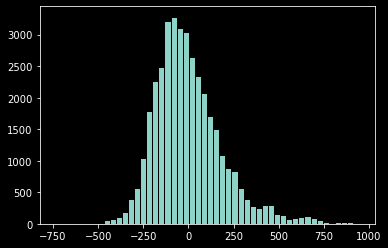

In [272]:
plt.hist(err_train_lin , bins=50, edgecolor='black');

In [204]:
err_train_lin.skew()

1.0200551205357855

In [205]:
err_train_lin.kurtosis() +3

5.03468292368974

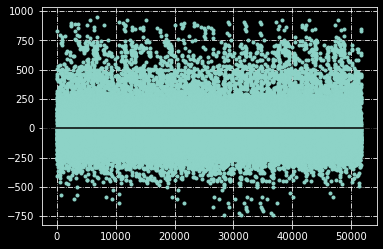

In [206]:
plt.plot(err_train_lin , '.')
plt.grid(linestyle='-.')
plt.axhline(y=err_train_lin.mean() , color='black')

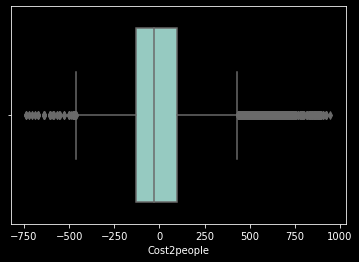

In [207]:
sns.boxplot(err_train_lin) ;

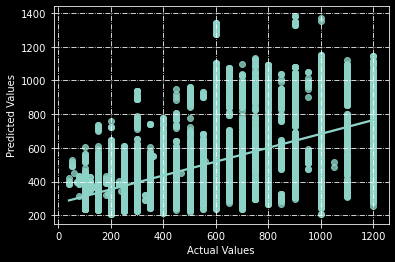

In [208]:
sns.regplot(x=df1_cost2people_train_y, y=pred_train_lin)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(linestyle='-.')

In [209]:
mse_train_lin = np.mean(np.square(err_train_lin))
mse_train_lin

37202.29349627292

In [210]:
rmse_train_lin = np.sqrt(mse_train_lin)
rmse_train_lin

192.8789607403382

In [211]:
mape_train_lin = np.mean(np.abs(err_train_lin/df1_cost2people_train_y*100))
mape_train_lin

43.074435549869385

In [212]:
acc_train_lin = 100-mape_train_lin
acc_train_lin

56.925564450130615

#### Taking care of Outliers :-

In [148]:
def remove_outliers(df , col , k):
    mean=df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k*sd)]
    final_list = [x for x in final_list if (x < mean + k*sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print('number of outliers removed===>>' , df.shape[0] - df1.shape[0])

In [151]:
 remove_outliers(df1_cost2people , 'Cost2people' , 1.5) # applying above designed UDF to remove outliers from data.

(47309, 9)
number of outliers removed===>> 3768


#### Lasso Model Building:-

In [213]:
from sklearn.linear_model import Lasso
las = Lasso()

In [214]:
las.fit(df1_cost2people_train_x ,df1_cost2people_train_y)
las.score(df1_cost2people_train_x ,df1_cost2people_train_y)

0.4110761698131691

In [215]:
pred_train_las = las.predict(df1_cost2people_train_x)
pred_test_las = las.predict(df1_cost2people_test_x)


err_train_las = df1_cost2people_train_y - pred_train_las
err_test_las = df1_cost2people_test_y - pred_test_las


mse_train_las = np.mean(np.square(err_train_las))
mse_test_las = np.mean(np.square(err_test_las))


mape_train_las = np.mean(np.abs(err_train_las * 100 / df1_cost2people_train_y))
mape_test_las = np.mean(np.abs(err_test_las * 100 / df1_cost2people_test_y))

In [216]:
mse_train_las

37223.096978821486

In [217]:
mse_test_las

37576.922522496185

In [218]:
mape_train_las

43.13662608988891

In [219]:
mape_test_las

42.33100832240296

In [178]:
cost2people_coef = pd.DataFrame()
cost2people_coef['features'] = df1_cost2people_train_x.columns
cost2people_coef['coef'] = linreg.coef_
cost2people_coef['coef_lasso'] = las.coef_
cost2people_coef.sort_values('coef_lasso',ascending=False)
cost2people_coef

,features,coef,coef_lasso
0,online_order,1.188958,0.000000
1,book_table,351.751958,337.668401
2,rate,19.148234,13.020314
3,votes,0.068195,0.071729
4,location,0.585927,0.590442
5,rest_type,-35.506381,-35.597295
6,cuisines,1.054792,1.080605
7,Type,15.377787,14.485403


In [179]:
cost2people_rel = pd.DataFrame(cost2people_coef[cost2people_coef['coef_lasso']!=0])
cost2people_rel

,features,coef,coef_lasso
1,book_table,351.751958,337.668401
2,rate,19.148234,13.020314
3,votes,0.068195,0.071729
4,location,0.585927,0.590442
5,rest_type,-35.506381,-35.597295
6,cuisines,1.054792,1.080605
7,Type,15.377787,14.485403


In [193]:
l1_lasso = list(cost2people_coef.features[1::])
l1_lasso.append('Cost2people')
l1_lasso

['book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'Type',
 'Cost2people']

#### Feature selection using Regressive Feature Elimination Technique:

In [220]:
from sklearn.feature_selection import RFE

In [233]:
rfe_lin = RFE(linreg , n_features_to_select= 7)

In [234]:
x=df1_cost2people.drop(['Cost2people'],axis=1)
y=df1_cost2people.Cost2people

In [235]:
rfe_lin.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [236]:
rfe_lin.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [237]:
# now lets create df
feat_imp_rfe = pd.DataFrame()
feat_imp_rfe['features'] = x.columns
feat_imp_rfe['imp'] = rfe_lin.support_

In [238]:
feat_imp_rfe[feat_imp_rfe.imp == True]

,features,imp
0,book_table,True
1,rate,True
2,votes,True
3,location,True
4,rest_type,True
5,cuisines,True
6,Type,True


In [ ]:
# similar features are suggested by RFE feature importance method.

#### XGBOOST Regressor :-

In [242]:
from sklearn.metrics import *

In [239]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

In [240]:
xgb_reg.fit(df1_cost2people_train_x, df1_cost2people_train_y)
xgb_pred = xgb_reg.predict(df1_cost2people_test_x)

In [243]:
xgb_r2 = r2_score(df1_cost2people_test_y, xgb_pred)
xgb_r2

0.7851423409030296

In [245]:
err_test_xgb = df1_cost2people_test_y - xgb_pred 

In [246]:
mape_test_xgb = np.mean(np.abs(err_test_xgb/df1_cost2people_test_y*100))
mape_test_xgb

25.06912097340715

In [247]:
acc_xgb = 100-mape_test_xgb
acc_xgb

74.93087902659285

In [ ]:
# So far best results are achieved in XGBoost Regressor model : MAPE value is approx:25 and accuracy is approx:75

#### Decision Tree Regressor :--

In [249]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()

In [250]:
dt_reg.fit(df1_cost2people_train_x, df1_cost2people_train_y)

DecisionTreeRegressor()

In [251]:
dt_reg_pred = dt_reg.predict(df1_cost2people_test_x)

In [252]:
dt_r2 = r2_score(df1_cost2people_test_y, dt_reg_pred)
dt_r2

0.8687470467197445

In [255]:
err_test_dt = df1_cost2people_test_y - dt_reg_pred

In [256]:
mape_test_dt = np.mean(np.abs(err_test_dt/df1_cost2people_test_y*100))
mape_test_dt

10.56886287831878

In [257]:
acc_dt_reg = 100-mape_test_dt
acc_dt_reg

89.43113712168122

#### Random Forest Regressor :--

In [258]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [259]:
rf_reg.fit(df1_cost2people_train_x, df1_cost2people_train_y)

RandomForestRegressor()

In [260]:
rf_pred_reg = rf_reg.predict(df1_cost2people_test_x)

In [261]:
rf_r2 = r2_score(df1_cost2people_test_y, rf_pred_reg)
rf_r2

0.9042117219153525

In [262]:
err_test_rf = df1_cost2people_test_y - rf_pred_reg

In [263]:
mape_test_rf = np.mean(np.abs(err_test_rf/df1_cost2people_test_y*100))
mape_test_rf

12.220625405120021

In [264]:
acc_rf = 100-mape_test_rf
acc_rf

87.77937459487998

#### check for variance in the columns (if any) , using Variance Technique :-

In [268]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold()

In [269]:
var.fit(df1_cost2people)

VarianceThreshold()

In [270]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [196]:
# Important features suggested by Lasso and RFE are : book table , rate , votes , location , rest_type , cuisines and type.
# Decision Tree Regressor and Random Forest Regressor out perform all other algorithms with Rsq being highest for RF regressor
# and least for Linear Regressor.

####  From VIF it is clearly evitable that all the features are having some amount of variance and hence information gain .

In [170]:
display_colored_heading_with_border("sentiment analysis :- ", "black", "lightblue", "black")

In [171]:
df1_sentiment = df1_reviews[['name','reviews_list','rate']]
df1_sentiment.head()

,name,reviews_list,rate
0,Jalsa,"[('Rated 4.0', 'RATED\n A beautiful place to ...",4.1
1,Spice Elephant,"[('Rated 4.0', 'RATED\n Had been here for din...",4.1
2,San Churro Cafe,"[('Rated 3.0', ""RATED\n Ambience is not that ...",3.8
3,Addhuri Udupi Bhojana,"[('Rated 4.0', ""RATED\n Great food and proper...",3.7
4,Grand Village,"[('Rated 4.0', 'RATED\n Very good restaurant ...",3.8


In [172]:
df1_sentiment.shape

(51077, 3)

In [179]:
import re
from tqdm import tqdm

#### cleaning reviews column :--

In [174]:
all_ratings = []

for name,ratings in tqdm(zip(df1_sentiment['name'],df1_sentiment['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])

51077it [00:15, 3352.07it/s]


In [175]:
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [176]:
rating_df.head()

,name,rating,review
0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,Jalsa,4.0,I was here for dinner with my family on a week...
2,Jalsa,2.0,Its a restaurant near to Banashankari BDA Me a...
3,Jalsa,4.0,We went here on a weekend and one of us had th...
4,Jalsa,5.0,The best thing about the place is its ambiance...


In [177]:
rating_df_with_name = rating_df

In [379]:
rating_df = rating_df[['review','rating']]      # selecting necessary columns for sentiment analysis
rating_df.head()

,review,rating
0,A beautiful place to dine inThe interiors take...,4.0
1,I was here for dinner with my family on a week...,4.0
2,Its a restaurant near to Banashankari BDA Me a...,2.0
3,We went here on a weekend and one of us had th...,4.0
4,The best thing about the place is its ambiance...,5.0


In [380]:
labels=['below avg','avg','great']
rating_df['rating_group'] = pd.cut(rating_df['rating'],bins=3,labels=labels)
rating_df.head()

,review,rating,rating_group
0,A beautiful place to dine inThe interiors take...,4.0,great
1,I was here for dinner with my family on a week...,4.0,great
2,Its a restaurant near to Banashankari BDA Me a...,2.0,below avg
3,We went here on a weekend and one of us had th...,4.0,great
4,The best thing about the place is its ambiance...,5.0,great


In [381]:
rating_df.drop(['rating'],axis=1,inplace=True)

In [382]:
rating_df.drop_duplicates(inplace=True)

In [383]:
rating_df.head()

,review,rating_group
0,A beautiful place to dine inThe interiors take...,great
1,I was here for dinner with my family on a week...,great
2,Its a restaurant near to Banashankari BDA Me a...,below avg
3,We went here on a weekend and one of us had th...,great
4,The best thing about the place is its ambiance...,great


In [384]:
rating_df= rating_df.rename(columns = ({"rating_group" : "Y" , "review" : "X"}))
rating_df.head()

,X,Y
0,A beautiful place to dine inThe interiors take...,great
1,I was here for dinner with my family on a week...,great
2,Its a restaurant near to Banashankari BDA Me a...,below avg
3,We went here on a weekend and one of us had th...,great
4,The best thing about the place is its ambiance...,great


In [386]:
rating_df.X = rating_df.X.str.lower() # Mandtory
rating_df.head()

,X,Y
0,a beautiful place to dine inthe interiors take...,great
1,i was here for dinner with my family on a week...,great
2,its a restaurant near to banashankari bda me a...,below avg
3,we went here on a weekend and one of us had th...,great
4,the best thing about the place is its ambiance...,great


In [180]:
# importing necessary libraries :--
import nltk # nltk - natural language toolkit
from nltk.corpus import stopwords
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [388]:
l1_stopwords = stopwords.words("english")

In [389]:
def text_process(mess):            ### creating a function

    """                                                        ## a docstring

    1. remove the punctuation

    2. remove the stopwords

    3. return the list of clean textwords

    

    """

    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = "".join(nopunc)

    

    return [ word for word in nopunc.split() if word not in l1]

In [181]:
from sklearn.feature_extraction.text import CountVectorizer

In [391]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(rating_df["X"])

In [392]:
bow_transformer.vocabulary_

{'a': 3368,
 'beautiful': 10355,
 'place': 63001,
 'to': 84369,
 'dine': 25328,
 'inthe': 42112,
 'interiors': 42058,
 'take': 80964,
 'you': 91790,
 'back': 8817,
 'the': 82824,
 'mughal': 54121,
 'era': 28689,
 'lightings': 47870,
 'are': 7084,
 'just': 43942,
 'perfectwe': 61919,
 'went': 90041,
 'there': 83071,
 'on': 57941,
 'occasion': 57120,
 'of': 57236,
 'christmas': 18380,
 'and': 6259,
 'so': 76463,
 'they': 83224,
 'had': 37338,
 'only': 58201,
 'limited': 47996,
 'items': 42556,
 'available': 8043,
 'but': 14770,
 'taste': 81332,
 'service': 73701,
 'was': 89358,
 'not': 56640,
 'compromised': 20088,
 'at': 7678,
 'allthe': 5085,
 'complaint': 19982,
 'is': 42329,
 'that': 82728,
 'breads': 13587,
 'could': 21136,
 'have': 38005,
 'been': 10470,
 'betterwould': 11218,
 'surely': 80171,
 'like': 47915,
 'come': 19701,
 'here': 38486,
 'again': 4394,
 'i': 40459,
 'for': 32768,
 'dinner': 25391,
 'with': 90657,
 'my': 54670,
 'family': 30236,
 'weekday': 89704,
 'restaurant'

#### # Create a TDM

In [393]:
tdm = bow_transformer.transform(rating_df.X)

In [395]:
# tdm will act as our X  - using tdm we will build the model

#### Sampling stage:--

In [396]:
train_X  , test_X , train_Y  , test_Y = train_test_split(tdm , rating_df.Y , test_size = .2)

#### model building stage:-

#### NAIVE BAYES

In [397]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_X , train_Y)

MultinomialNB()

In [398]:
nb_pred = nb.predict(test_X)
nb_pred

array(['avg', 'great', 'avg', ..., 'avg', 'great', 'avg'], dtype='<U9')

In [399]:
tab_nb = confusion_matrix(test_Y , nb_pred)
tab_nb = pd.DataFrame(tab_nb)
tab_nb.columns = ['avg','below avg','great']
tab_nb.index = ['avg','below avg','great']
tab_nb

,avg,below avg,great
avg,2589,639,1844
below avg,730,4152,292
great,1322,461,12903


In [400]:
print(classification_report(test_Y , nb_pred))

              precision    recall  f1-score   support

         avg       0.56      0.51      0.53      5072
   below avg       0.79      0.80      0.80      5174
       great       0.86      0.88      0.87     14686

    accuracy                           0.79     24932
   macro avg       0.74      0.73      0.73     24932
weighted avg       0.78      0.79      0.79     24932



#### Logistic Regression Model :

In [401]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(train_X , train_Y)
pred_logreg = logreg.predict(test_X)

In [402]:
tab_logreg = confusion_matrix(test_Y , pred_logreg)
tab_logreg  = pd.DataFrame(tab_logreg )
tab_logreg .columns = ['avg','below avg','great']
tab_logreg .index =['avg','below avg','great']
tab_logreg 

,avg,below avg,great
avg,3114,920,1038
below avg,546,4541,87
great,2245,470,11971


In [403]:
print(classification_report(test_Y , pred_logreg))

              precision    recall  f1-score   support

         avg       0.53      0.61      0.57      5072
   below avg       0.77      0.88      0.82      5174
       great       0.91      0.82      0.86     14686

    accuracy                           0.79     24932
   macro avg       0.74      0.77      0.75     24932
weighted avg       0.80      0.79      0.79     24932



#### Building Decision Tree :-

In [414]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced',criterion='gini',max_depth=9,min_samples_split=26)

In [415]:
dt.fit(train_X ,train_Y)

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       min_samples_split=26)

In [416]:
pred_dt = dt.predict(test_X)

In [417]:
tab_dt = confusion_matrix(test_Y , pred_dt)
tab_dt  = pd.DataFrame(tab_dt )
tab_dt.columns = ['avg','below avg','great']
tab_dt .index = ['avg','below avg','great']
tab_dt 

,avg,below avg,great
avg,2310,1361,1401
below avg,823,3989,362
great,2830,2191,9665


In [418]:
print(classification_report(test_Y , pred_dt))

              precision    recall  f1-score   support

         avg       0.39      0.46      0.42      5072
   below avg       0.53      0.77      0.63      5174
       great       0.85      0.66      0.74     14686

    accuracy                           0.64     24932
   macro avg       0.59      0.63      0.60     24932
weighted avg       0.69      0.64      0.65     24932



In [409]:
#from sklearn.model_selection import GridSearchCV

In [410]:
# search_dict = {'criterion':['gini','entropy'] , 
#                'max_depth':range(5,10) , 
#                 'min_samples_split':range(25,30)}

In [411]:
#grid = GridSearchCV(dt , param_grid=search_dict)

In [412]:
#grid.fit(train_X ,train_Y)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'min_samples_split': range(25, 30)})

In [413]:
#grid.best_params_ 

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 26}

#### Random Forest:--

In [419]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')

In [420]:
rfc.fit(train_X ,train_Y)

RandomForestClassifier(class_weight='balanced')

In [421]:
pred_rfc = rfc.predict(test_X)

In [422]:
tab_rfc = confusion_matrix(test_Y , pred_rfc)
tab_rfc = pd.DataFrame(tab_rfc )
tab_rfc.columns =['avg','below avg','great']
tab_rfc.index = ['avg','below avg','great']
tab_rfc

,avg,below avg,great
avg,329,486,4257
below avg,179,3618,1377
great,113,179,14394


In [423]:
print(classification_report(test_Y , pred_rfc ))

              precision    recall  f1-score   support

         avg       0.53      0.06      0.12      5072
   below avg       0.84      0.70      0.77      5174
       great       0.72      0.98      0.83     14686

    accuracy                           0.74     24932
   macro avg       0.70      0.58      0.57     24932
weighted avg       0.71      0.74      0.67     24932



#### Adaboost:--

In [424]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(dt)

In [425]:
abc.fit(train_X ,train_Y)
abc_pred = abc.predict(test_X)

In [429]:
# building confusion matrix :--

tab_abc = confusion_matrix(test_Y , abc_pred)
tab_abc = pd.DataFrame(tab_abc)
tab_abc.columns = ['avg','below avg','great']
tab_abc.index =['avg','below avg','great']
tab_abc

,avg,below avg,great
avg,2663,809,1600
below avg,962,4000,212
great,2566,421,11699


In [430]:
print(classification_report(test_Y, abc_pred))

              precision    recall  f1-score   support

         avg       0.43      0.53      0.47      5072
   below avg       0.76      0.77      0.77      5174
       great       0.87      0.80      0.83     14686

    accuracy                           0.74     24932
   macro avg       0.69      0.70      0.69     24932
weighted avg       0.76      0.74      0.74     24932



#### Catboost :-

In [432]:
import catboost

In [433]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(train_X ,train_Y)

Learning rate set to 0.100061
0:	learn: 1.0387668	total: 825ms	remaining: 13m 44s
1:	learn: 0.9917330	total: 1.43s	remaining: 11m 53s
2:	learn: 0.9532679	total: 2.04s	remaining: 11m 17s
3:	learn: 0.9214645	total: 2.73s	remaining: 11m 19s
4:	learn: 0.8953737	total: 3.33s	remaining: 11m 2s
5:	learn: 0.8736492	total: 3.9s	remaining: 10m 46s
6:	learn: 0.8541725	total: 4.53s	remaining: 10m 42s
7:	learn: 0.8362650	total: 5.16s	remaining: 10m 39s
8:	learn: 0.8205564	total: 5.78s	remaining: 10m 36s
9:	learn: 0.8071816	total: 6.48s	remaining: 10m 41s
10:	learn: 0.7960509	total: 7.03s	remaining: 10m 32s
11:	learn: 0.7854287	total: 7.62s	remaining: 10m 27s
12:	learn: 0.7755742	total: 8.25s	remaining: 10m 26s
13:	learn: 0.7666282	total: 8.85s	remaining: 10m 23s
14:	learn: 0.7577912	total: 9.41s	remaining: 10m 17s
15:	learn: 0.7490712	total: 10.2s	remaining: 10m 25s
16:	learn: 0.7416585	total: 10.7s	remaining: 10m 18s
17:	learn: 0.7352811	total: 11.3s	remaining: 10m 15s
18:	learn: 0.7292610	total: 

157:	learn: 0.5392967	total: 1m 29s	remaining: 7m 54s
158:	learn: 0.5388550	total: 1m 29s	remaining: 7m 54s
159:	learn: 0.5384336	total: 1m 30s	remaining: 7m 53s
160:	learn: 0.5379856	total: 1m 30s	remaining: 7m 53s
161:	learn: 0.5375573	total: 1m 31s	remaining: 7m 52s
162:	learn: 0.5371905	total: 1m 31s	remaining: 7m 51s
163:	learn: 0.5368031	total: 1m 32s	remaining: 7m 51s
164:	learn: 0.5364014	total: 1m 32s	remaining: 7m 50s
165:	learn: 0.5360887	total: 1m 33s	remaining: 7m 49s
166:	learn: 0.5355872	total: 1m 33s	remaining: 7m 48s
167:	learn: 0.5351867	total: 1m 34s	remaining: 7m 48s
168:	learn: 0.5346306	total: 1m 35s	remaining: 7m 47s
169:	learn: 0.5342562	total: 1m 35s	remaining: 7m 46s
170:	learn: 0.5339470	total: 1m 36s	remaining: 7m 46s
171:	learn: 0.5335734	total: 1m 36s	remaining: 7m 45s
172:	learn: 0.5331829	total: 1m 37s	remaining: 7m 44s
173:	learn: 0.5327784	total: 1m 37s	remaining: 7m 44s
174:	learn: 0.5324187	total: 1m 38s	remaining: 7m 43s
175:	learn: 0.5319700	total:

310:	learn: 0.4986391	total: 2m 48s	remaining: 6m 13s
311:	learn: 0.4985174	total: 2m 48s	remaining: 6m 12s
312:	learn: 0.4984574	total: 2m 49s	remaining: 6m 12s
313:	learn: 0.4983155	total: 2m 50s	remaining: 6m 11s
314:	learn: 0.4981269	total: 2m 50s	remaining: 6m 10s
315:	learn: 0.4980382	total: 2m 51s	remaining: 6m 10s
316:	learn: 0.4978675	total: 2m 51s	remaining: 6m 9s
317:	learn: 0.4977452	total: 2m 52s	remaining: 6m 9s
318:	learn: 0.4976816	total: 2m 52s	remaining: 6m 8s
319:	learn: 0.4976335	total: 2m 53s	remaining: 6m 7s
320:	learn: 0.4974319	total: 2m 53s	remaining: 6m 7s
321:	learn: 0.4972452	total: 2m 54s	remaining: 6m 6s
322:	learn: 0.4970626	total: 2m 54s	remaining: 6m 6s
323:	learn: 0.4969907	total: 2m 55s	remaining: 6m 5s
324:	learn: 0.4967261	total: 2m 55s	remaining: 6m 4s
325:	learn: 0.4965499	total: 2m 56s	remaining: 6m 4s
326:	learn: 0.4964918	total: 2m 56s	remaining: 6m 3s
327:	learn: 0.4963783	total: 2m 57s	remaining: 6m 3s
328:	learn: 0.4962097	total: 2m 57s	rema

464:	learn: 0.4842355	total: 4m 5s	remaining: 4m 42s
465:	learn: 0.4842249	total: 4m 6s	remaining: 4m 42s
466:	learn: 0.4842084	total: 4m 6s	remaining: 4m 41s
467:	learn: 0.4841376	total: 4m 7s	remaining: 4m 41s
468:	learn: 0.4840480	total: 4m 7s	remaining: 4m 40s
469:	learn: 0.4840213	total: 4m 8s	remaining: 4m 39s
470:	learn: 0.4839791	total: 4m 8s	remaining: 4m 39s
471:	learn: 0.4839490	total: 4m 9s	remaining: 4m 38s
472:	learn: 0.4838595	total: 4m 9s	remaining: 4m 38s
473:	learn: 0.4837584	total: 4m 10s	remaining: 4m 37s
474:	learn: 0.4836722	total: 4m 10s	remaining: 4m 37s
475:	learn: 0.4836073	total: 4m 11s	remaining: 4m 36s
476:	learn: 0.4836017	total: 4m 11s	remaining: 4m 36s
477:	learn: 0.4835190	total: 4m 12s	remaining: 4m 35s
478:	learn: 0.4834496	total: 4m 12s	remaining: 4m 35s
479:	learn: 0.4833229	total: 4m 13s	remaining: 4m 34s
480:	learn: 0.4832982	total: 4m 13s	remaining: 4m 33s
481:	learn: 0.4832722	total: 4m 14s	remaining: 4m 33s
482:	learn: 0.4832379	total: 4m 14s	r

617:	learn: 0.4782693	total: 5m 20s	remaining: 3m 18s
618:	learn: 0.4782536	total: 5m 21s	remaining: 3m 17s
619:	learn: 0.4782508	total: 5m 21s	remaining: 3m 17s
620:	learn: 0.4782371	total: 5m 22s	remaining: 3m 16s
621:	learn: 0.4782336	total: 5m 22s	remaining: 3m 16s
622:	learn: 0.4781927	total: 5m 23s	remaining: 3m 15s
623:	learn: 0.4781486	total: 5m 23s	remaining: 3m 15s
624:	learn: 0.4781431	total: 5m 24s	remaining: 3m 14s
625:	learn: 0.4781354	total: 5m 24s	remaining: 3m 13s
626:	learn: 0.4781250	total: 5m 25s	remaining: 3m 13s
627:	learn: 0.4781190	total: 5m 25s	remaining: 3m 12s
628:	learn: 0.4781153	total: 5m 26s	remaining: 3m 12s
629:	learn: 0.4781034	total: 5m 26s	remaining: 3m 11s
630:	learn: 0.4780862	total: 5m 27s	remaining: 3m 11s
631:	learn: 0.4779987	total: 5m 27s	remaining: 3m 10s
632:	learn: 0.4779390	total: 5m 27s	remaining: 3m 10s
633:	learn: 0.4779252	total: 5m 28s	remaining: 3m 9s
634:	learn: 0.4778358	total: 5m 29s	remaining: 3m 9s
635:	learn: 0.4776852	total: 5

771:	learn: 0.4742011	total: 6m 35s	remaining: 1m 56s
772:	learn: 0.4741560	total: 6m 35s	remaining: 1m 56s
773:	learn: 0.4741481	total: 6m 36s	remaining: 1m 55s
774:	learn: 0.4741428	total: 6m 36s	remaining: 1m 55s
775:	learn: 0.4741080	total: 6m 37s	remaining: 1m 54s
776:	learn: 0.4740720	total: 6m 37s	remaining: 1m 54s
777:	learn: 0.4739788	total: 6m 38s	remaining: 1m 53s
778:	learn: 0.4739669	total: 6m 38s	remaining: 1m 53s
779:	learn: 0.4739602	total: 6m 39s	remaining: 1m 52s
780:	learn: 0.4739539	total: 6m 39s	remaining: 1m 52s
781:	learn: 0.4739508	total: 6m 40s	remaining: 1m 51s
782:	learn: 0.4739413	total: 6m 40s	remaining: 1m 51s
783:	learn: 0.4739378	total: 6m 41s	remaining: 1m 50s
784:	learn: 0.4739280	total: 6m 41s	remaining: 1m 50s
785:	learn: 0.4738812	total: 6m 42s	remaining: 1m 49s
786:	learn: 0.4738689	total: 6m 42s	remaining: 1m 49s
787:	learn: 0.4738610	total: 6m 43s	remaining: 1m 48s
788:	learn: 0.4738324	total: 6m 43s	remaining: 1m 47s
789:	learn: 0.4738263	total:

925:	learn: 0.4708000	total: 7m 51s	remaining: 37.7s
926:	learn: 0.4707951	total: 7m 52s	remaining: 37.2s
927:	learn: 0.4707920	total: 7m 52s	remaining: 36.7s
928:	learn: 0.4707883	total: 7m 53s	remaining: 36.2s
929:	learn: 0.4707633	total: 7m 53s	remaining: 35.6s
930:	learn: 0.4707581	total: 7m 53s	remaining: 35.1s
931:	learn: 0.4706548	total: 7m 54s	remaining: 34.6s
932:	learn: 0.4706399	total: 7m 54s	remaining: 34.1s
933:	learn: 0.4706345	total: 7m 55s	remaining: 33.6s
934:	learn: 0.4706309	total: 7m 55s	remaining: 33.1s
935:	learn: 0.4705817	total: 7m 56s	remaining: 32.6s
936:	learn: 0.4705771	total: 7m 56s	remaining: 32.1s
937:	learn: 0.4705718	total: 7m 57s	remaining: 31.5s
938:	learn: 0.4705491	total: 7m 57s	remaining: 31s
939:	learn: 0.4705452	total: 7m 58s	remaining: 30.5s
940:	learn: 0.4705395	total: 7m 58s	remaining: 30s
941:	learn: 0.4705353	total: 7m 59s	remaining: 29.5s
942:	learn: 0.4705319	total: 7m 59s	remaining: 29s
943:	learn: 0.4704996	total: 8m	remaining: 28.5s
944

In [434]:
pred_test_cbc = cbc.predict(test_X)

In [435]:
# building confusion matrix :--

tab_cbc = confusion_matrix(test_Y, pred_test_cbc)
tab_cbc = pd.DataFrame(tab_cbc)
tab_cbc.columns = ['avg','below avg','great' ]
tab_cbc.index =['avg','below avg','great'  ]
tab_cbc

,avg,below avg,great
avg,2016,741,2315
below avg,471,4246,457
great,665,244,13777


In [436]:
print(classification_report(test_Y , pred_test_cbc))

              precision    recall  f1-score   support

         avg       0.64      0.40      0.49      5072
   below avg       0.81      0.82      0.82      5174
       great       0.83      0.94      0.88     14686

    accuracy                           0.80     24932
   macro avg       0.76      0.72      0.73     24932
weighted avg       0.79      0.80      0.79     24932



#### CatBoosting has improved results overall.Especially for class below avg and great.

In [461]:
display_colored_heading_with_border("Overall Review Sentiment analysis with TextBlob  :- ", "black", "lightblue", "black")

In [462]:
from textblob import TextBlob

In [463]:
rating_df.head()

,X,Y
0,a beautiful place to dine inthe interiors take...,great
1,i was here for dinner with my family on a week...,great
2,its a restaurant near to banashankari bda me a...,below avg
3,we went here on a weekend and one of us had th...,great
4,the best thing about the place is its ambiance...,great


In [464]:
# List to store sentiment polarity scores
sent_list = []

# Iterate over the DataFrame rows using the correct range
for i in range(rating_df.shape[0]):
    var1 = TextBlob(rating_df['X'].iloc[i])
    sent_list.append(var1.sentiment.polarity)

# Add the sentiment scores to the DataFrame
rating_df['TextBlob_Score'] = sent_list


In [466]:
rating_df.TextBlob_Score.mean()

0.2088320247499157

#### Textblob sentiment polarity score is above zero. hence it indicates that overall sentiment is positive.

####  TextBlob score is range bound between -1 to +1. negative values indicate negative sentiment and positive value indicate positive sentiment . 

In [467]:
display_colored_heading_with_border("Overall Review Sentiment analysis with Vader  :- ", "black", "lightblue", "black")

In [468]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [469]:
nltk.download('vader_lexicon')
sent = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HARSH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [471]:
sent_list1 = []
i = 0

while i < rating_df.shape[0]:
    var1 = sent.polarity_scores(rating_df.iloc[i]['X'])
    sent_list1.append(var1['compound'])
    i = i + 1

rating_df['vader_score'] = sent_list1

In [472]:
rating_df.head()

,X,Y,TextBlob_Score,vader_score
0,a beautiful place to dine inthe interiors take...,great,0.172321,0.7430
1,i was here for dinner with my family on a week...,great,0.500000,0.9623
2,its a restaurant near to banashankari bda me a...,below avg,0.112500,0.7964
3,we went here on a weekend and one of us had th...,great,0.641667,0.9678
4,the best thing about the place is its ambiance...,great,0.485000,0.9702


In [474]:
rating_df['vader_score'].mean()

0.5215943598587865

####  In this case, the score is 0.52 , which means that the texts  being analyzed have close to neutral sentiments overall


In [477]:
display_colored_heading_with_border("Predict Time taken by Delivery person to deliver food :--", "black", "lightblue", "black")

In [492]:
df2.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46
1,21,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1,No,Metropolitian,21
3,34,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,20
4,24,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,41


In [503]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43853 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          43853 non-null  int32         
 1   Delivery_person_Ratings      43853 non-null  float64       
 2   Restaurant_latitude          43853 non-null  float64       
 3   Restaurant_longitude         43853 non-null  float64       
 4   Delivery_location_latitude   43853 non-null  float64       
 5   Delivery_location_longitude  43853 non-null  float64       
 6   Time_Orderd                  39785 non-null  datetime64[ns]
 7   Time_Order_picked            39045 non-null  datetime64[ns]
 8   Weather_conditions           43853 non-null  object        
 9   Road_traffic_density         43853 non-null  object        
 10  Vehicle_condition            43853 non-null  int64         
 11  Type_of_order                43853 non-nu

#### Extracting Day , Month and Year from Order_Date column :--

In [494]:
df2['order_day'] = df2['Order_Date'].dt.day_name()
df2['order_month'] = df2['Order_Date'].dt.month
df2['order_year'] = df2['Order_Date'].dt.year

In [496]:
pd.set_option('display.max_column',None)

In [517]:
df2.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),order_day,order_month,order_year,response_time
0,36,4.2,30.327968,78.046106,30.397968,78.116106,1900-01-01 21:55:00,1900-01-01 22:10:00,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46,Saturday,2,2022,15
1,21,4.7,10.003064,76.307589,10.043064,76.347589,1900-01-01 14:55:00,1900-01-01 15:05:00,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,23,Sunday,2,2022,10
2,23,4.7,18.562450,73.916619,18.652450,74.006619,1900-01-01 17:30:00,1900-01-01 17:40:00,Sandstorms,Medium,1,Drinks,scooter,1,No,Metropolitian,21,Friday,3,2022,10
3,34,4.3,30.899584,75.809346,30.919584,75.829346,1900-01-01 09:20:00,1900-01-01 09:30:00,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,20,Sunday,2,2022,10
4,24,4.7,26.463504,80.372929,26.593504,80.502929,1900-01-01 19:50:00,1900-01-01 20:05:00,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,41,Monday,2,2022,15


In [498]:
df2.drop(['Order_Date'],axis=1,inplace=True)

In [502]:
df2['Time_Order_picked'] = pd.to_datetime(df2['Time_Order_picked'], format='%H:%M',errors='coerce')
df2['Time_Orderd'] = pd.to_datetime(df2['Time_Orderd'], format='%H:%M',errors='coerce')


In [514]:
df2.dropna(inplace=True)

In [515]:
df2.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
order_day                      0
order_month                    0
order_year                     0
response_time                  0
dtype: int64

In [508]:
# Calculate the difference in minutes
df2['response_time'] = (df2['Time_Order_picked'] - df2['Time_Orderd']).dt.total_seconds() / 60

In [ ]:
# lets convert response column to int type for further analysis:--

In [518]:
df2['response_time'] = df2['response_time'].astype(int)  # Convert to integer

In [519]:
df2.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'order_day', 'order_month', 'order_year',
       'response_time'],
      dtype='object')

In [521]:
df2.drop(['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)

In [525]:
df2.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),order_day,order_month,response_time
0,36,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46,Saturday,2,15
1,21,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,23,Sunday,2,10
2,23,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1,No,Metropolitian,21,Friday,3,10
3,34,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,20,Sunday,2,10
4,24,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,41,Monday,2,15


In [523]:
df2['order_year'].value_counts() # lets drop this column as it is homogeneous and Information Gain is zero.

2022    35407
Name: order_year, dtype: int64

In [524]:
df2.drop(['order_year'],axis=1,inplace=True)

#### Reshuffling columns for model building :--

In [526]:
df2 = df2[['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude',
                 'Delivery_location_latitude','Delivery_location_longitude','Weather_conditions',
                'Road_traffic_density','Vehicle_condition','Type_of_order','Type_of_vehicle','multiple_deliveries',
               'Festival','City','order_day','order_month','response_time','Time_taken (min)']]

In [527]:
df2.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,order_day,order_month,response_time,Time_taken (min)
0,36,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,Saturday,2,15,46
1,21,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,Sunday,2,10,23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,scooter,1,No,Metropolitian,Friday,3,10,21
3,34,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,Sunday,2,10,20
4,24,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,Monday,2,15,41


#### check for nulls :--

In [529]:
df2.isnull().sum()[df2.isnull().sum()>0]

Series([], dtype: int64)

#### Building a model to predict time taken by delivery agent to deliver food (in mins

In [530]:
df2.select_dtypes(include='object').columns

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'order_day'],
      dtype='object')

In [531]:
#Replacing all non numeric columns with numberic :--
df2.Weather_conditions.replace({'Fog':1, 'Stormy':2, 'Sandstorms':3, 'Windy':4, 'Cloudy':5, 'Sunny':6},inplace=True)
df2.Road_traffic_density.replace({'Jam':4, 'High':3, 'Medium':2, 'Low':1},inplace=True)
df2.Type_of_order.replace({'Snack':1, 'Meal':2, 'Drinks':3, 'Buffet':4},inplace=True)
df2.Type_of_vehicle.replace({'motorcycle':1, 'scooter':2, 'electric_scooter':3},inplace=True)
df2.Festival.replace({'No':0, 'Yes':1},inplace=True)
df2.City.replace({'Metropolitian':1, 'Urban':3, 'Semi-Urban':2},inplace=True)
df2.order_day.replace({'Saturday':6, 'Sunday':7, 'Friday':5, 'Monday':1, 'Tuesday':2, 'Wednesday':3,
       'Thursday':4},inplace=True)

In [532]:
df2.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,order_day,order_month,response_time,Time_taken (min)
0,36,4.2,30.327968,78.046106,30.397968,78.116106,1,4,2,1,1,3,0,1,6,2,15,46
1,21,4.7,10.003064,76.307589,10.043064,76.347589,2,3,1,2,1,1,0,1,7,2,10,23
2,23,4.7,18.562450,73.916619,18.652450,74.006619,3,2,1,3,2,1,0,1,5,3,10,21
3,34,4.3,30.899584,75.809346,30.919584,75.829346,3,1,0,4,1,0,0,1,7,2,10,20
4,24,4.7,26.463504,80.372929,26.593504,80.502929,1,4,1,1,2,1,0,1,1,2,15,41


In [534]:
df2.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,order_day,order_month,response_time,Time_taken (min)
Delivery_person_Age,1.000000,-0.120697,0.005781,0.004415,0.006463,0.004410,0.008942,0.002047,-0.004032,0.007262,0.000451,0.115272,0.059686,-0.062731,0.007636,-0.004473,-0.007390,0.304548
Delivery_person_Ratings,-0.120697,1.000000,-0.012866,-0.014682,-0.014831,-0.014873,0.023014,-0.075703,0.047130,-0.004235,0.023753,-0.126475,-0.065351,0.058523,-0.008553,-0.007043,0.004971,-0.361178
Restaurant_latitude,0.005781,-0.012866,1.000000,0.647531,0.935069,0.647581,0.006464,0.012507,-0.002275,0.000832,-0.012693,0.009111,0.005222,-0.010433,-0.005438,-0.037398,-0.008112,0.016903
Restaurant_longitude,0.004415,-0.014682,0.647531,1.000000,0.688758,0.999998,0.006441,0.011901,-0.001471,0.001810,-0.015709,0.003270,-0.002002,-0.010397,-0.008476,0.085697,-0.008462,0.011834
Delivery_location_latitude,0.006463,-0.014831,0.935069,0.688758,1.000000,0.688819,0.005476,0.013188,0.000157,0.001368,-0.013563,0.010312,0.002892,-0.007477,-0.003275,-0.078136,-0.010239,0.016492
Delivery_location_longitude,0.004410,-0.014873,0.647581,0.999998,0.688819,1.000000,0.006441,0.012284,-0.001462,0.001802,-0.015703,0.003482,-0.001840,-0.010505,-0.008438,0.085659,-0.008466,0.012398
Weather_conditions,0.008942,0.023014,0.006464,0.006441,0.005476,0.006441,1.000000,0.002548,-0.003688,0.001444,-0.001185,-0.046290,-0.022070,0.031204,-0.009735,0.000236,-0.000312,-0.135707
Road_traffic_density,0.002047,-0.075703,0.012507,0.011901,0.013188,0.012284,0.002548,1.000000,0.012469,-0.008624,0.009821,0.156782,0.120092,-0.074312,-0.001542,-0.005435,0.007972,0.415203
Vehicle_condition,-0.004032,0.047130,-0.002275,-0.001471,0.000157,-0.001462,-0.003688,0.012469,1.000000,-0.002972,0.631614,-0.099786,-0.086849,0.040471,0.007746,-0.003492,0.006345,-0.245743
Type_of_order,0.007262,-0.004235,0.000832,0.001810,0.001368,0.001802,0.001444,-0.008624,-0.002972,1.000000,-0.003221,0.001858,-0.010277,0.002231,-0.003748,-0.002043,0.001827,-0.002530


In [535]:
#Low or Negative Correlation with Target:

#Columns with very low or negative correlations with the target may not contribute much to the model and can be
#considered for dropping.

#### from above correlation matrix it is clearly evitable that following columns have least collinearity with target variable

In [536]:
df2.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',
           'Type_of_order','order_day','order_month','response_time','City','Type_of_vehicle'],axis=1,inplace=True)

In [537]:
df2.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min)
0,36,4.2,1,4,2,3,0,46
1,21,4.7,2,3,1,1,0,23
2,23,4.7,3,2,1,1,0,21
3,34,4.3,3,1,0,0,0,20
4,24,4.7,1,4,1,1,0,41


In [562]:
# code after removing outliers:
df2= df1

#### Sampling Stage:--

In [563]:
df2_train , df2_test = train_test_split(df2 , test_size=0.20)

df2_train_x = df2_train.drop(['Time_taken (min)'],axis=1)
df2_train_y = df2_train['Time_taken (min)']

df2_test_x = df2_test.drop(['Time_taken (min)'],axis=1)
df2_test_y = df2_test['Time_taken (min)']

In [564]:
from sklearn.preprocessing import StandardScaler

In [565]:
# Standardizing the data
scaler = StandardScaler()
df2_train_x_scaled = scaler.fit_transform(df2_train_x)
df2_test_x_scaled = scaler.transform(df2_test_x)

In [566]:
# df2_train_x_scaled and df2_test_x_scaled are now standardized and ready for model building

In [567]:
from sklearn.linear_model import LinearRegression
linreg_2 = LinearRegression()

In [568]:
linreg_2.fit(df2_train_x_scaled ,df2_train_y)

LinearRegression()

In [569]:
Rsq = linreg_2.score(df2_train_x_scaled ,df2_train_y)
Rsq

0.4608953638743686

In [570]:
N = df2_train_x.shape[0]
K= df2_train_x.shape[1]
AdjRSq= 1-(1-Rsq) * (N-1) / (N-K-1)
AdjRSq

0.4607573795805049

In [571]:
# prediction using linreg 
pred_train_lin = linreg_2.predict(df2_train_x_scaled)

In [572]:
# error linreg 
err_train_lin = df2_train_y - pred_train_lin
err_train_lin.mean()

1.6823995945776397e-15

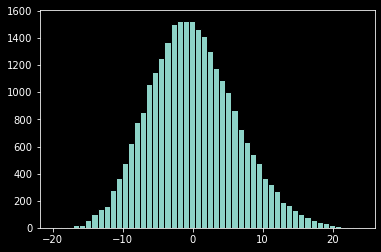

In [573]:
plt.hist(err_train_lin , bins=50, edgecolor='black');

In [574]:
err_train_lin.skew()

0.27918018801059

In [575]:
err_train_lin.kurtosis() +3

2.9789178297763015

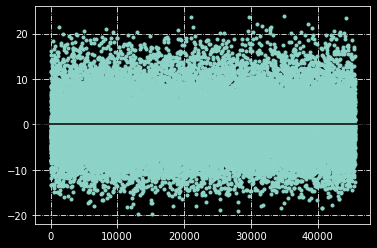

In [576]:
plt.plot(err_train_lin , '.')
plt.grid(linestyle='-.')
plt.axhline(y=err_train_lin.mean() , color='black')

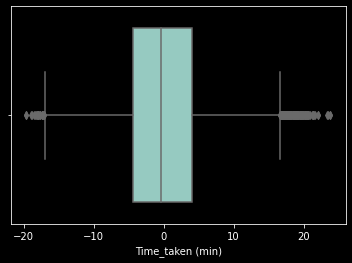

In [577]:
sns.boxplot(err_train_lin) ;

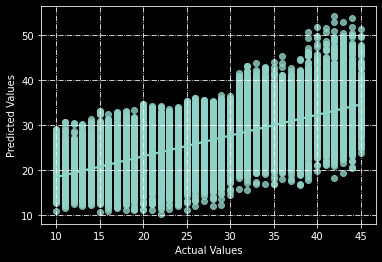

In [578]:
sns.regplot(x=df2_train_y , y=pred_train_lin)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(linestyle='-.')

In [579]:
mse_train_lin = np.mean(np.square(err_train_lin))
mse_train_lin

39.15799542432567

In [580]:
rmse_train_lin = np.sqrt(mse_train_lin)
rmse_train_lin

6.2576349705240615

In [581]:
mape_train_lin = np.mean(np.abs(err_train_lin/df2_train_y*100))
mape_train_lin

22.8229792854063

In [582]:
acc_train_lin = 100-mape_train_lin
acc_train_lin

77.1770207145937

#### Taking care of Outliers :-

In [560]:
def remove_outliers(df , col , k):
    mean=df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k*sd)]
    final_list = [x for x in final_list if (x < mean + k*sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print('number of outliers removed===>>' , df.shape[0] - df1.shape[0])

In [561]:
 remove_outliers(df2 , 'Time_taken (min)' , 2)

(34197, 8)
number of outliers removed===>> 1210


In [584]:
df2_vif = df2

In [585]:
df2_vif.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min)
1,21,4.7,2,3,1,1,0,23
2,23,4.7,3,2,1,1,0,21
3,34,4.3,3,1,0,0,0,20
4,24,4.7,1,4,1,1,0,41
5,29,4.5,3,4,2,1,0,20


#### Variance Inflation Factor :--

In [583]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [587]:
df2_vif['new_col'] = 1   # we are adding a new col with random new value so constant value exist in all columns.
df2_vif.head()              #this is required for VIF score calculation

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),new_col
1,21,4.7,2,3,1,1,0,23,1
2,23,4.7,3,2,1,1,0,21,1
3,34,4.3,3,1,0,0,0,20,1
4,24,4.7,1,4,1,1,0,41,1
5,29,4.5,3,4,2,1,0,20,1


In [588]:
# code for vif :--
vif_list = []
for i in range(0 , df2_vif.shape[1]):
    vif_list.append(variance_inflation_factor(df2_vif.values , i))

In [589]:
vif_list

[1.1376288143603348,
 1.1833491482587644,
 1.036705577578645,
 1.2358555048202637,
 1.0712800096540631,
 1.1316354445932877,
 1.0461863328445467,
 1.844667714594416,
 347.03291789418097]

In [590]:
vif_df = pd.DataFrame()
vif_df['columns'] = df2_vif.columns
vif_df['vif_score'] = vif_list

In [591]:
vif_df.sort_values(['vif_score'])

,columns,vif_score
2,Weather_conditions,1.036706
6,Festival,1.046186
4,Vehicle_condition,1.071280
5,multiple_deliveries,1.131635
0,Delivery_person_Age,1.137629
1,Delivery_person_Ratings,1.183349
3,Road_traffic_density,1.235856
7,Time_taken (min),1.844668
8,new_col,347.032918


In [592]:
#### Since , no column has VIF score above 10 , we can safely assume that no multi-collinearity between the columns exist.

#### Decision Tree Regressor :-

In [600]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()

In [601]:
dt_reg.fit(df2_train_x_scaled ,df2_train_y)

DecisionTreeRegressor()

In [602]:
dt_pred = dt_reg.predict(df2_test_x_scaled)

In [603]:
dt_r2 = r2_score(df2_test_y, dt_pred)
dt_r2

0.5141308525751668

In [604]:
dt_mse = mean_squared_error(df2_test_y, dt_pred)
dt_mse

35.59731623081642

In [605]:
err_test_dt = df2_test_y- dt_pred

In [606]:
mape_test_dt = np.mean(np.abs(err_test_dt/df2_test_y*100))
mape_test_dt

19.78558656943597

In [607]:
acc_dt = 100-mape_test_dt
acc_dt

80.21441343056404

#### Random Forest Regressor :--

In [608]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [609]:
rf_reg.fit(df2_train_x_scaled ,df2_train_y)

RandomForestRegressor()

In [610]:
rf_pred = rf_reg.predict(df2_test_x_scaled)

In [613]:
rf_r2 = r2_score(df2_test_y ,rf_pred )
rf_r2

0.608723285640973

In [614]:
rf_mse = mean_squared_error(df2_test_y ,rf_pred)
rf_mse

28.666979594434764

In [615]:
err_test_rf = df2_test_y - rf_pred

In [616]:
mape_test_rf = np.mean(np.abs(err_test_rf/df2_test_y*100))
mape_test_rf

18.12159647757197

In [617]:
acc_rf = 100-mape_test_rf
acc_rf

81.87840352242803

#### XGBOOST Regressor :--

In [618]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

In [619]:
xgb_reg.fit(df2_train_x_scaled ,df2_train_y)
xgb_pred = xgb_reg.predict(df2_test_x_scaled)

In [620]:
xgb_r2 = r2_score(df2_test_y, xgb_pred)
xgb_r2

0.6910915970802307

In [621]:
xgb_mse = mean_squared_error(df2_test_y, xgb_pred)
xgb_mse

22.632246625160025

In [622]:
err_test_xgb = df2_test_y - xgb_pred 

In [623]:
mape_test_xgb = np.mean(np.abs(err_test_xgb/df2_test_y*100))
mape_test_xgb

16.700957504500476

In [624]:
acc_xgb = 100-mape_test_xgb
acc_xgb

83.29904249549952

#### Adaboost Regressor :--

In [625]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor()
ada_reg.fit(df2_train_x_scaled ,df2_train_y)
ada_pred = ada_reg.predict(df2_test_x_scaled)

In [626]:
ada_r2 = r2_score(df2_test_y, ada_pred)
ada_r2

0.5224090136870421

In [627]:
ada_mse = mean_squared_error(df2_test_y, ada_pred)
ada_mse

34.990814829212894

In [628]:
err_test_ada = df2_test_y - ada_pred  

In [629]:
mape_test_ada = np.mean(np.abs(err_test_ada/df2_test_y*100))
mape_test_ada

22.947843407014705

In [630]:
acc_ada = 100-mape_test_ada
acc_ada

77.0521565929853

#### check for variance in the columns (if any) , using Variance Technique :--

In [631]:
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold()

In [632]:
var.fit(df2)

VarianceThreshold()

In [633]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False])

In [635]:
# Hence all the features are having some amount of variance and hence information gain .

In [634]:
df2.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Time_taken (min),new_col
1,21,4.7,2,3,1,1,0,23,1
2,23,4.7,3,2,1,1,0,21,1
3,34,4.3,3,1,0,0,0,20,1
4,24,4.7,1,4,1,1,0,41,1
5,29,4.5,3,4,2,1,0,20,1


In [197]:
# XGBoost Regressor outperforms other algorithms with Rsq being highest i.e 0.69 and MAPE being least i.e 16.70 and accuracy
# being 83.29% ; followed by RF Regressor Algorithm.

In [636]:
display_colored_heading_with_border("Restaurant Recommendation based on similar reviews", "black", "lightblue", "black")

In [178]:
rating_df_with_name.head()

,name,rating,review
0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,Jalsa,4.0,I was here for dinner with my family on a week...
2,Jalsa,2.0,Its a restaurant near to Banashankari BDA Me a...
3,Jalsa,4.0,We went here on a weekend and one of us had th...
4,Jalsa,5.0,The best thing about the place is its ambiance...


In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [183]:
# Group by restaurant names and concatenate the reviews
df_grouped =rating_df_with_name.groupby('name')['review'].apply(lambda x: ' '.join(x)).reset_index()


In [184]:
# Preview grouped dataset
df_grouped.head()

,name,review
0,#FeelTheROLL,Had an egg chicken roll and a paneer roll Real...
1,#L-81 Cafe,This little cafe is set in a very beautiful lo...
2,#Vibes Restro,Great service and dont forget to try the Tomat...
3,#refuel,We ordered for Schezwan Paneer Sandwich Combo ...
4,1 Fahreheit,An awesome place for some delightful icecream ...


In [ ]:
#Vectorize the Reviews:
# Use TF-IDF to convert the text data into numerical vectors

In [185]:
# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_grouped['review'])

In [186]:
# Display shape of the TF-IDF matrix
print(tfidf_matrix.shape)

(6987, 92210)


In [ ]:
# Compute Cosine Similarity:
#Calculate the cosine similarity matrix based on the TF-IDF vectors

In [187]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
#Create a Function to Get Recommendations:
#Build a function that takes a restaurant name and returns similar restaurants.

In [188]:
# Create a mapping of restaurant name to index
indices = pd.Series(df_grouped.index, index=df_grouped['name']).drop_duplicates()

def get_recommendations(name, cosine_sim=cosine_sim):
    if name not in indices:
        return "Restaurant not found in the dataset."
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 similar restaurants
    restaurant_indices = [i[0] for i in sim_scores]
    return df_grouped['name'].iloc[restaurant_indices]

In [189]:
# Example usage:1
print(get_recommendations('Jalsa'))

2924                       Jalsa Gold
459                            Atithi
2082    Flavours - Octave Hotel & Spa
4501                          Paprica
6232                   The Globe Grub
15                               1947
4324                  Nouvelle Garden
1013                    Cafe @ Elanza
6822                        West Wood
2088                         Flechazo
Name: name, dtype: object


In [193]:
# Example usage:2
print(get_recommendations('Cafe Coffee Day'))

618                        Barista
6486    Third Wave Coffee Roasters
1035    Cafe Coffee Day The Square
1496              Coffee Mechanics
228        Alchemy Coffee Roasters
1592                         Cuppa
3766                 Matteo Coffea
1034    Cafe Coffee Day The Lounge
3108               Kalmane Koffees
2499                   Hatti Kaapi
Name: name, dtype: object


In [196]:
# Example usage:3
print(get_recommendations("McDonald's"))

3784                Mc Donald's
971                 Burger King
3800               Meat and Eat
961                      Bundar
6562                   Truffles
754     Biggies Burger 'n' More
5468        Smally's Resto Cafe
1313       Cheesy Juicy Burgers
6859                   Wolf'ish
1609       D'7 Feast Resto Cafe
Name: name, dtype: object


In [197]:
display_colored_heading_with_border("Clustering ", "black", "lightblue", "black")

In [53]:
df2_delivery_person_id.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [57]:
df1.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2people,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [60]:
df1['name'].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Mast Biryani - Night Express                                1
Kings Court Daba                                            1
New Prakash Hotel                                           1
Taja Coffee                                                 1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8723, dtype: int64

In [88]:
df1_cluster = df1 # taking a backup for making clusters

In [89]:
df1_cluster.head()

,name,online_order,book_table,rate,rest_type,Cost2people,Type
0,Jalsa,Yes,Yes,4.1,Casual Dining,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,Casual Dining,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,Quick Bites,300.0,Buffet
4,Grand Village,No,No,3.8,Casual Dining,600.0,Buffet


In [91]:
df1_cluster.head()

,name,online_order,book_table,rate,rest_type,Cost2people,Type
0,Jalsa,Yes,Yes,4.1,Casual Dining,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,Casual Dining,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,Quick Bites,300.0,Buffet
4,Grand Village,No,No,3.8,Casual Dining,600.0,Buffet


In [92]:
df1_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51077 entries, 0 to 51716
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51077 non-null  object 
 1   online_order  51077 non-null  object 
 2   book_table    51077 non-null  object 
 3   rate          51077 non-null  float64
 4   rest_type     51077 non-null  object 
 5   Cost2people   51077 non-null  float64
 6   Type          51077 non-null  object 
dtypes: float64(2), object(5)
memory usage: 3.1+ MB


In [93]:
# Group by restaurant name and calculate mean for 'rate' and 'Cost2people'
df1_cluster_grouped1 = df1_cluster.groupby('name').agg({'rate': 'mean', 'Cost2people': 'mean'}).reset_index()

In [94]:
df1_cluster_grouped1.head()

,name,rate,Cost2people
0,#FeelTheROLL,3.400000,200.0
1,#L-81 Cafe,3.900000,400.0
2,#Vibes Restro,3.700526,700.0
3,#refuel,3.700000,400.0
4,'Brahmins' Thatte Idli,3.700526,100.0


In [95]:
df1_cluster_grouped1.shape

(8723, 3)

In [96]:
df1_cluster_grouped2 = df1_cluster_grouped1 # just taking a backup of data for clustering purposes
df1_cluster_grouped2.head()

,name,rate,Cost2people
0,#FeelTheROLL,3.400000,200.0
1,#L-81 Cafe,3.900000,400.0
2,#Vibes Restro,3.700526,700.0
3,#refuel,3.700000,400.0
4,'Brahmins' Thatte Idli,3.700526,100.0


In [97]:
labels = ['below_avg','avg','above_avg']
df1_cluster_grouped2['rate_group'] = pd.cut(df1_cluster_grouped2['rate'],bins=3,labels=labels)
df1_cluster_grouped2.head()

,name,rate,Cost2people,rate_group
0,#FeelTheROLL,3.400000,200.0,avg
1,#L-81 Cafe,3.900000,400.0,above_avg
2,#Vibes Restro,3.700526,700.0,avg
3,#refuel,3.700000,400.0,avg
4,'Brahmins' Thatte Idli,3.700526,100.0,avg


In [98]:
df1_cluster_grouped2.Cost2people.describe()

count    8723.000000
mean      497.147865
std       431.066287
min        40.000000
25%       250.000000
50%       400.000000
75%       600.000000
max      6000.000000
Name: Cost2people, dtype: float64

In [100]:
df1_cluster_grouped2['Cost2people_category'] = pd.cut(df1_cluster_grouped2['Cost2people'], bins=[df1_cluster_grouped2['Cost2people'].min(),
                                250, 400, 600,df1_cluster_grouped2['Cost2people'].max()], 
                          labels=['low_budget', 'med_budget', 'high_budget','Expensive'])

In [101]:
df1_cluster_grouped2.head()

,name,rate,Cost2people,rate_group,Cost2people_category
0,#FeelTheROLL,3.400000,200.0,avg,low_budget
1,#L-81 Cafe,3.900000,400.0,above_avg,med_budget
2,#Vibes Restro,3.700526,700.0,avg,Expensive
3,#refuel,3.700000,400.0,avg,med_budget
4,'Brahmins' Thatte Idli,3.700526,100.0,avg,low_budget


In [102]:
df1_cluster_grouped2.drop(['rate','Cost2people'],axis=1,inplace=True)

In [103]:
df1_cluster_grouped2.head()

,name,rate_group,Cost2people_category
0,#FeelTheROLL,avg,low_budget
1,#L-81 Cafe,above_avg,med_budget
2,#Vibes Restro,avg,Expensive
3,#refuel,avg,med_budget
4,'Brahmins' Thatte Idli,avg,low_budget


In [104]:
df1_cluster_grouped3 = df1_cluster_grouped2
df1_cluster_grouped3.head()

,name,rate_group,Cost2people_category
0,#FeelTheROLL,avg,low_budget
1,#L-81 Cafe,above_avg,med_budget
2,#Vibes Restro,avg,Expensive
3,#refuel,avg,med_budget
4,'Brahmins' Thatte Idli,avg,low_budget


In [109]:
df1_cluster_grouped3.rate_group.value_counts()
df1_cluster_grouped3.Cost2people_category.value_counts()

med_budget     2964
low_budget     2307
Expensive      1774
high_budget    1677
Name: Cost2people_category, dtype: int64

In [108]:
df1_cluster_grouped3.rate_group.replace({'avg':2,
                                         'above_avg':3,
                                         'below_avg':1},inplace=True)

In [111]:
df1_cluster_grouped3.Cost2people_category.replace({'low_budget':1,
                                         'med_budget':2,
                                         'high_budget':3,
                                          'Expensive':4},inplace=True)

In [115]:
df1_cluster_grouped3.head()

,name,rate_group,Cost2people_category
0,#FeelTheROLL,2,1
1,#L-81 Cafe,3,2
2,#Vibes Restro,2,4
3,#refuel,2,2
4,'Brahmins' Thatte Idli,2,1


In [116]:
df1_cluster_grouped3 = pd.get_dummies(df1_cluster_grouped3,columns=['rate_group','Cost2people_category'])

In [117]:
df1_cluster_grouped3.head()

,name,rate_group_1,rate_group_2,rate_group_3,Cost2people_category_1,Cost2people_category_2,Cost2people_category_3,Cost2people_category_4
0,#FeelTheROLL,0,1,0,1,0,0,0
1,#L-81 Cafe,0,0,1,0,1,0,0
2,#Vibes Restro,0,1,0,0,0,0,1
3,#refuel,0,1,0,0,1,0,0
4,'Brahmins' Thatte Idli,0,1,0,1,0,0,0


In [118]:
df1_cluster_grouped3.drop(['name'],axis=1,inplace=True)

In [119]:
df1_cluster_grouped3.head()

,rate_group_1,rate_group_2,rate_group_3,Cost2people_category_1,Cost2people_category_2,Cost2people_category_3,Cost2people_category_4
0,0,1,0,1,0,0,0
1,0,0,1,0,1,0,0
2,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0
4,0,1,0,1,0,0,0


#### Note:- Here no sampling is needed since this is unsupervised technique 

In [120]:
from sklearn.cluster import KMeans

In [143]:
kmeans=KMeans(n_clusters=5)

In [144]:
kmeans.fit(df1_cluster_grouped3) # at this point kmeans model is ready

KMeans(n_clusters=5)

In [145]:
kmeans.score(df1_cluster_grouped3)

-2032.256571074911

#### this gives the SSD(ignore the negative signs as distance cannot be negative ; this is python setting)

In [146]:
list(kmeans.labels_) # this will tell us which record is part of which cluster

[1,
 2,
 1,
 0,
 1,
 1,
 0,
 4,
 0,
 3,
 3,
 3,
 3,
 3,
 2,
 4,
 3,
 0,
 1,
 3,
 1,
 4,
 3,
 3,
 1,
 0,
 4,
 1,
 1,
 1,
 3,
 0,
 3,
 3,
 2,
 4,
 4,
 2,
 2,
 0,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 4,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 3,
 3,
 1,
 1,
 0,
 4,
 0,
 0,
 4,
 1,
 1,
 1,
 1,
 3,
 4,
 0,
 4,
 4,
 1,
 1,
 1,
 4,
 1,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 4,
 4,
 1,
 1,
 1,
 0,
 0,
 0,
 4,
 2,
 4,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 4,
 1,
 4,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 4,
 0,
 0,
 4,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 3,
 1,
 0,
 3,
 0,
 4,
 1,
 1,
 1,
 0,
 1,
 3,
 0,
 1,
 4,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 4,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 4,
 1,
 4,
 0,
 1,
 0,
 4,
 4,
 1,
 2,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 4,
 4,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 3,
 4,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 0,
 4,
 1,
 4,
 1,
 1,
 1,
 2,
 0,
 2,
 3,
 4,
 0,
 4,


In [147]:
df1_cluster_grouped3['Labels'] = kmeans.labels_
df1_cluster_grouped3.head()

,rate_group_1,rate_group_2,rate_group_3,Cost2people_category_1,Cost2people_category_2,Cost2people_category_3,Cost2people_category_4,Labels
0,0,1,0,1,0,0,0,1
1,0,0,1,0,1,0,0,2
2,0,1,0,0,0,0,1,1
3,0,1,0,0,1,0,0,0
4,0,1,0,1,0,0,0,1


In [148]:
# label column indicates which restaurant is part of which cluster

#### now lets plot elbowplot : 

In [139]:
ssd_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit(df1_cluster_grouped3)
    ssd_list.append(kmeans.score(df1_cluster_grouped3))

In [140]:
ssd_list = np.abs(ssd_list)
# this will give ssd value for each value of k 
ssd_list = np.round(ssd_list)

In [141]:
k = list(range(1,11)) # for plotting of Elbow plot

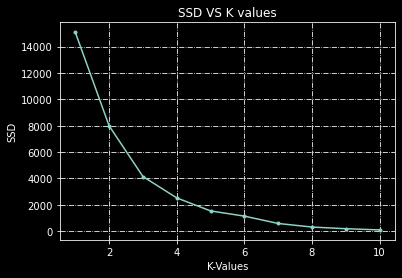

In [142]:
plt.plot(k,ssd_list , marker='.')
plt.xlabel("K-Values")
plt.ylabel("SSD")
plt.title("SSD VS K values")
plt.grid(linestyle='-.')

In [149]:
df1_cluster_grouped3.columns

Index(['rate_group_1', 'rate_group_2', 'rate_group_3',
       'Cost2people_category_1', 'Cost2people_category_2',
       'Cost2people_category_3', 'Cost2people_category_4', 'Labels'],
      dtype='object')

#### Now we rebuild the cluster model with value interpreted from elbow plot i.e K=5

In [152]:
df2_delivery_person_id.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [153]:
df2_cluster = df2_delivery_person_id

In [155]:
df2_cluster = df2_cluster.iloc[ ::1     ,   [1,2,3,19]  ]
df2_cluster.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,46
1,KOCRES16DEL01,21.0,4.7,23
2,PUNERES13DEL03,23.0,4.7,21
3,LUDHRES15DEL02,34.0,4.3,20
4,KNPRES14DEL02,24.0,4.7,41


In [156]:
labels3 = ['below_avg','avg','above_avg']
df2_cluster['rate_category'] = pd.cut(df2_cluster['Delivery_person_Ratings'],bins=3,labels=labels3)
df2_cluster.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_taken (min),rate_category
0,DEHRES17DEL01,36.0,4.2,46,avg
1,KOCRES16DEL01,21.0,4.7,23,above_avg
2,PUNERES13DEL03,23.0,4.7,21,above_avg
3,LUDHRES15DEL02,34.0,4.3,20,avg
4,KNPRES14DEL02,24.0,4.7,41,above_avg


In [157]:
df2_cluster = pd.get_dummies(df2_cluster,columns=['rate_category'])

In [158]:
df2_cluster.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_taken (min),rate_category_below_avg,rate_category_avg,rate_category_above_avg
0,DEHRES17DEL01,36.0,4.2,46,0,1,0
1,KOCRES16DEL01,21.0,4.7,23,0,0,1
2,PUNERES13DEL03,23.0,4.7,21,0,0,1
3,LUDHRES15DEL02,34.0,4.3,20,0,1,0
4,KNPRES14DEL02,24.0,4.7,41,0,0,1


In [159]:
df2_cluster.drop(['Delivery_person_ID'],axis=1,inplace=True)

In [162]:
df2_cluster.head()

,Delivery_person_Age,Time_taken (min),rate_category_below_avg,rate_category_avg,rate_category_above_avg
0,36.0,46,0,1,0
1,21.0,23,0,0,1
2,23.0,21,0,0,1
3,34.0,20,0,1,0
4,24.0,41,0,0,1


In [161]:
df2_cluster.drop(['Delivery_person_Ratings'],axis=1,inplace=True)

In [167]:
df2_cluster.isnull().sum()

Delivery_person_Age        0
Time_taken (min)           0
rate_category_below_avg    0
rate_category_avg          0
rate_category_above_avg    0
dtype: int64

In [166]:
df2_cluster.Delivery_person_Age.fillna(df2_cluster.Delivery_person_Age.mean(),inplace=True)

In [181]:
kmeans2 = KMeans(n_clusters=4) 

In [182]:
kmeans2.fit(df2_cluster)

KMeans(n_clusters=4)

In [183]:
kmeans2.score(df2_cluster)

-1417167.9684268504

In [184]:
list(kmeans2.labels_)

[0,
 2,
 1,
 3,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 3,
 3,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 3,
 3,
 1,
 3,
 0,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 3,
 1,
 2,
 3,
 3,
 1,
 3,
 1,
 0,
 1,
 1,
 3,
 0,
 3,
 3,
 1,
 3,
 0,
 3,
 3,
 1,
 3,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 3,
 0,
 3,
 0,
 1,
 2,
 1,
 3,
 1,
 0,
 2,
 0,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 3,
 2,
 0,
 3,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 3,
 3,
 1,
 1,
 0,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 3,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 3,
 3,
 0,
 0,
 2,
 2,
 1,
 3,
 3,
 2,
 2,
 2,
 3,
 0,
 1,
 3,
 3,
 1,
 0,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 1,
 1,
 3,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 3,
 2,
 0,
 3,
 1,
 3,
 2,
 0,
 3,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 3,
 2,
 2,
 0,
 1,
 3,
 2,
 1,
 2,
 1,
 1,
 3,
 3,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 3,
 0,
 3,
 1,
 1,
 3,
 1,
 3,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 3,
 3,
 2,
 0,
 2,
 2,
 1,
 0,


In [185]:
df2_cluster['Labels'] = kmeans2.labels_
df2_cluster.head()

,Delivery_person_Age,Time_taken (min),rate_category_below_avg,rate_category_avg,rate_category_above_avg,Labels
0,36.0,46,0,1,0,0
1,21.0,23,0,0,1,2
2,23.0,21,0,0,1,1
3,34.0,20,0,1,0,3
4,24.0,41,0,0,1,0


In [177]:
ssd_list2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i) 
    kmeans2.fit(df2_cluster)
    ssd_list2.append(kmeans2.score(df2_cluster))

In [178]:
ssd_list2 = np.abs(ssd_list2)
# this will give ssd value for each value of k 
ssd_list2 = np.round(ssd_list2)

In [179]:
k = list(range(1,11))

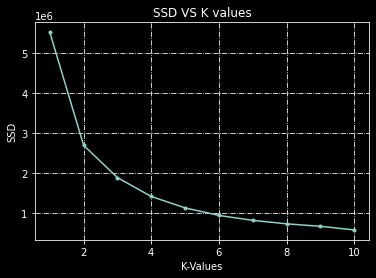

In [180]:
plt.plot(k,ssd_list2 , marker='.')
plt.xlabel("K-Values")
plt.ylabel("SSD")
plt.title("SSD VS K values")
plt.grid(linestyle='-.')

In [ ]:
#### Hence we rebuilt the cluster model with K=4 ; as interpreted from Elbow plot

In [186]:
df2_cluster.columns

Index(['Delivery_person_Age', 'Time_taken (min)', 'rate_category_below_avg',
       'rate_category_avg', 'rate_category_above_avg', 'Labels'],
      dtype='object')

Text(0, 0.5, 'Time_taken (min)')

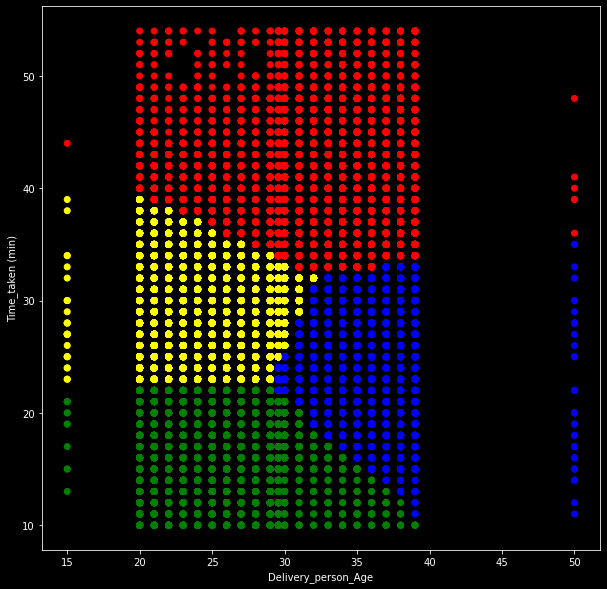

In [193]:
colormap = np.array(['red','green','yellow','blue'])
plt.figure(figsize=(10,10))
plt.scatter(df2_cluster['Delivery_person_Age'], df2_cluster['Time_taken (min)'], c = colormap[kmeans2.labels_])
plt.xlabel('Delivery_person_Age')
plt.ylabel('Time_taken (min)')

In [195]:
display_colored_heading_with_border("Conclusions:- ", "black", "lightblue", "black")

#### Conclusions from EDA for dataset 1 :-

In [198]:
# Most number of restaurants are at BTM , followed by HSR , Kormangla 5th block . 59.2% restaurants accept online orders
#and 48.2% dont accept online orders . Restaurants that accept online orders get max ratings . restaurants that provide
#book table facility have more avg ratings . majority restautants at all locations accept online orders; BTM being highest .
#Famous types of restaurants are: Drinks and Nightlife, Pubs and Bars , Buffet and Cafes . Top cuisines are:
#North Indian followed by Chinese and South Indian . Top Franchise chains are: Cafe CoffeeDay followed by Onesta and
#JustBake.Average cost of two people is between INR 300 to 1000.

#### Conclusions from EDA for dataset 2 :-

In [199]:
# Most delivery persons are between age 20 to 39 . 
# Max ratings for agents is between 4.5 to 5
# Frequency of number of orders remain almost similar in all weather conditions throughout the year.
# most number of orders were placed and delivered during low traffic conditions.
# Average time taken to deliver was most in traffic jam conditions. Average time to deliver was almost similar in high and 
# medium traffic conditions. least time was taken in low traffic conditions.

#### Conclusions from models built to predict cost of food for two people

In [200]:
# Important features suggested from Lasso and RFE Technique are:
# book_table , rate , votes , location , rest_type , cuisines , type.
# Decision Tree Regressor and Random Forest Regressor outperforms all other models. Rsq is highest for Random Forest(0.90) 
#and least for Linear Regressor(0.41).

#### Conclusions from Sentiment Analysis :-

#### Here we predicted from restaurant reviews whether rating is avg , below_avg or great using TDM based model:

In [202]:
# Multinomial Naive Bayes outperforms other models with f1 scores 0.53 for class avg , 0.80 for class below_avg and 0.87 for 
# class great. Accuracy of model is 0.87.
# Overall review sentiment using TextBlob: 0.2088
# Hence it indicates that overall review is positive
# TextBlob Score is range bound between -1 to +1.
# Overall review sentiment analysis using Vader :
# Here overall score is 0.52 which means that texts being analysed have close to neutral sentiments overall.

#### Conclusions from time taken by delivery person to deliver food :-

In [201]:
# XGBoost Regressor outperforms other algorithms with Rsq being highest i.e 0.69 and MAPE being least i.e 16.70 and accuracy 
# 83.29 % ; followed by Random Forest Regressor .

####                                                                         END OF REPORT